In [1]:
conda activate work


Note: you may need to restart the kernel to use updated packages.


'conda' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
import sys 
import math
import pandas as pd
import numpy as np
from sklearn.preprocessing import minmax_scale
from scipy.signal import find_peaks
from statistics import mean
from scipy.constants import c as c
import struct
sys.path.append('H:/GPR_work/')
import mig_fk
from plotly import io
import plotly.graph_objects as go
import matplotlib.pyplot as plt

C:\Users\steve.yang.ctr\Anaconda3\envs\charisma-env\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
info = {}
fid = open('H:/GPR_work/FILE____488.DZT','rb');
minheadsize = 1024
infoareasize = 128

In [4]:
rh_tag = struct.unpack('h', fid.read(2))[0]  # Pos 00 // 0x00ff if header, 0xfnff for old file
rh_data = struct.unpack('h', fid.read(2))[0] # Pos 02 // constant 1024 (obsolete)
rh_nsamp = struct.unpack('h', fid.read(2))[0] # Pos 04 // samples per scan
info["rh_nsamp"] = rh_nsamp
rh_bits = struct.unpack('h', fid.read(2))[0] # Pos 06 // bits per data word (8 or 16)
rh_zero = struct.unpack('h', fid.read(2))[0] # Pos 08 // Offset (0x80 or 0x8000 depends on rh_bits)
rhf_sps = struct.unpack('f', fid.read(4))[0] # Pos 10 // scans per second
info["rhf_sps"] = rhf_sps
rhf_spm = struct.unpack('f', fid.read(4))[0] # Pos 14 // scans per meter
info["rhf_spm"] = rhf_spm
rhf_mpm = struct.unpack('f', fid.read(4))[0] # Pos 18 // meters per mark
rhf_position = struct.unpack('f', fid.read(4))[0] # Pos 22 // position (ns)
info["rhf_position"] = rhf_position
rhf_range = struct.unpack('f', fid.read(4))[0] # Pos 26 // range (ns)
info["rhf_range"] = rhf_range
rh_npass = struct.unpack('h', fid.read(2))[0] # Pos 30 // num of passes for 2-D files
rhb_cdt = struct.unpack('f', fid.read(4))[0] # Pos 32 // Creation date & time
rhb_mdt = struct.unpack('f', fid.read(4))[0]  # Pos 36 // Last modification date & time
rh_mapOffset = struct.unpack('h', fid.read(2))[0] # Pos 40 // offset to range gain function
rh_mapSize = struct.unpack('h',fid.read(2))[0] # Pos 42 // size of range gain function
rh_text = struct.unpack('h',fid.read(2))[0] # Pos 44 // offset to text
rh_ntext = struct.unpack('h',fid.read(2))[0] # Pos 46 // size of text
rh_proc = struct.unpack('h',fid.read(2))[0] # Pos 48 // offset to processing history
rh_nproc = struct.unpack('h',fid.read(2))[0] # Pos 50 // size of processing history
rh_nchan = struct.unpack('h',fid.read(2))[0] # Pos 52 // number of channels
rhf_espr = struct.unpack('f', fid.read(4))[0] # Pos 54 // average dielectric constant
info["rhf_espr"] = rhf_espr
rhf_top = struct.unpack('f',fid.read(4))[0] # Pos 58 // position in meters
rhf_depth = struct.unpack('f',fid.read(4))[0] # Pos 62 // range in meters
info["rhf_depth"] = rhf_depth
fid.close()

In [ ]:
rh_tag

In [ ]:
rhf_top

In [ ]:
rh_data

In [ ]:
rh_nchan

In [ ]:
rhf_sps

In [ ]:
rhf_range

In [ ]:
rhf_espr

In [ ]:
info

In [ ]:
if rh_data < minheadsize:
    offset = minheadsize*rh_data
else:
    offset = minheadsize*rh_nchan   

if rh_bits == 8:
    datatype = 'uint8' # unsigned char
elif rh_bits == 16:
    datatype = 'uint16' # unsigned int
elif rh_bits == 32:
    datatype = 'int32'

In [ ]:
datatype

In [ ]:
offset

In [5]:
vec = np.fromfile('H:/GPR_work/FILE____488.DZT',dtype=datatype)
headlength = offset/(rh_bits/8)
datvec = vec[int(headlength):]

NameError: name 'datatype' is not defined

In [ ]:
headlength

In [ ]:
vec.shape

In [3]:
if rh_bits == 8 or rh_bits == 16:
    datvec = datvec - (2**rh_bits)/2.0
data = np.reshape(datvec,[int(len(datvec)/rh_nsamp),rh_nsamp])
data = np.asmatrix(data)

NameError: name 'rh_bits' is not defined

In [ ]:
data.shape

In [ ]:
headlength

In [ ]:
int(headlength)

In [ ]:
rh_bits

In [ ]:
(2**rh_bits)

In [ ]:
(2**rh_bits)/2

In [ ]:
data = data.transpose()

In [ ]:
data.shape

In [ ]:
data

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df

In [ ]:
df.shape

In [ ]:
n.shape

In [ ]:
df.shape[1]

In [4]:
def read_csv(directory):
    
    if not directory.endswith('/') and not directory.endswith('\\'):
        directory += '/'
    
    filepath_data = f"{directory}{'data'}.csv"
    filepath_config = f"{directory}{'config'}.csv"
    
    df_1 = pd.read_csv(filepath_data, header=None)
    df_2 = pd.read_csv(filepath_config)
    
    return df_1, df_2

In [5]:
user_directory = "H:/GPR_work"

In [6]:
df_1, df_2 = read_csv(user_directory)

In [9]:
df_1

0      1      2      3      4      5      6      7      8      9    \
0    -22.0  -36.0  -90.0  -10.0  -78.0  -46.0  -42.0  -42.0  -24.0  -42.0   
1    -22.0  -36.0  -90.0  -10.0  -78.0  -46.0  -42.0  -42.0  -24.0  -42.0   
2    -22.0  -36.0  -90.0  -10.0  -78.0  -46.0  -42.0  -42.0  -24.0  -42.0   
3    -24.0  -40.0 -100.0  -10.0  -86.0  -54.0  -46.0  -44.0  -28.0  -44.0   
4    -24.0  -42.0 -108.0  -10.0  -94.0  -62.0  -52.0  -48.0  -32.0  -48.0   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
507  298.0  403.0  220.0  166.0  413.0  560.0  704.0  766.0  661.0  370.0   
508  279.0  412.0  233.0  170.0  387.0  518.0  650.0  722.0  632.0  363.0   
509  258.0  409.0  239.0  169.0  358.0  474.0  592.0  671.0  597.0  349.0   
510  236.0  398.0  239.0  166.0  328.0  429.0  533.0  615.0  554.0  329.0   
511  214.0  379.0  233.0  159.0  296.0  383.0  473.0  556.0  507.0  306.0   

     ...    322    323   324   325   326    327    328    329    330    331  
0    ...  -48.0  -30.0 -64.0  -4.0 -62.0  -62.0  -88.0  -62.0  -44.0  -88.0  
1    ...  -48.0  -30.0 -64.0  -4.0 -62.0  -62.0  -88.0  -62.0  -44.0  -88.0  
2    ...  -48.0  -30.0 -64.0  -4.0 -62.0  -62.0  -88.0  -62.0  -44.0  -88.0  
3    ...  -56.0  -36.0 -70.0  -6.0 -70.0  -70.0  -96.0  -70.0  -48.0  -96.0  
4    ...  -62.0  -42.0 -76.0 -12.0 -76.0  -78.0 -106.0  -78.0  -54.0 -106.0  
..   ...    ...    ...   ...   ...   ...    ...    ...    ...    ...    ...  
507  ...  499.0  161.0 -44.0 -34.0  64.0  221.0  225.0  255.0  275.0  304.0  
508  ...  436.0  133.0 -44.0 -25.0  68.0  216.0  211.0  233.0  246.0  271.0  
509  ...  377.0  109.0 -43.0 -18.0  70.0  207.0  196.0  211.0  219.0  238.0  
510  ...  323.0   87.0 -40.0 -11.0  69.0  194.0  178.0  188.0  193.0  208.0  
511  ...  274.0   70.0 -36.0  -6.0  65.0  180.0  160.0  166.0  168.0  179.0  

[512 rows x 332 columns]

In [7]:
df_2

Unnamed: 0        config
0    minheadsize  1.024000e+03
1   infoareasize  1.280000e+02
2         rh_tag  1.792000e+03
3        rh_data  1.024000e+03
4       rh_nsamp  5.120000e+02
5        rh_bits  1.600000e+01
6        rh_zero  0.000000e+00
7        rhf_sps  1.200000e+02
8        rhf_spm  1.181102e+02
9        rhf_mpm  1.093613e+00
10  rhf_position  0.000000e+00
11     rhf_range  8.000000e+00
12      rh_npass  0.000000e+00
13       rhb_cdt  6.112805e+06
14       rhb_mdt  5.866680e+13
15  rh_mapOffset  0.000000e+00
16    rh_mapSize  0.000000e+00
17       rh_text  6.880000e+02
18      rh_ntext  0.000000e+00
19       rh_proc  1.280000e+02
20      rh_nproc  4.400000e+01
21      rh_nchan  1.000000e+00
22      rhf_espr  7.000000e+00
23       rhf_top -1.133893e-01
24     rhf_depth  4.535574e-01

In [7]:
for index, row in df_2.iterrows():
    variable_name = row['Unnamed: 0']  # Use the valid column name
    locals()[variable_name] = row['config']

In [11]:
rhf_top

-0.1133893430233001

In [12]:
df_1.shape[0]

512

In [13]:
df_1[0]

0      -22.0
1      -22.0
2      -22.0
3      -24.0
4      -24.0
       ...  
507    298.0
508    279.0
509    258.0
510    236.0
511    214.0
Name: 0, Length: 512, dtype: float64

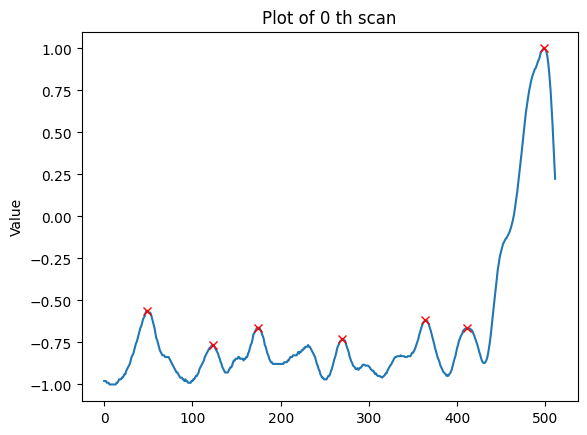

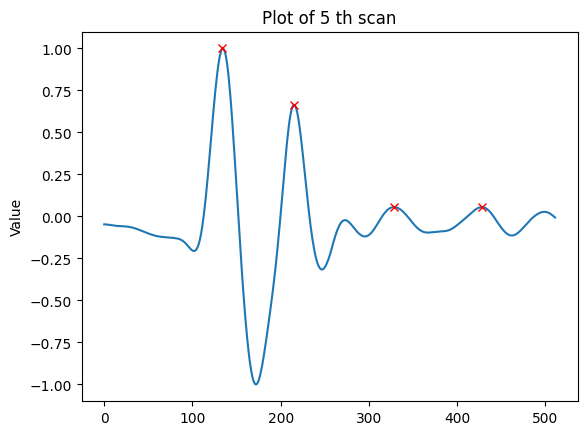

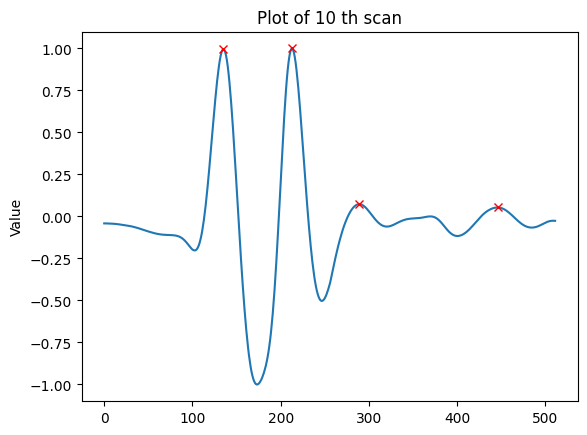

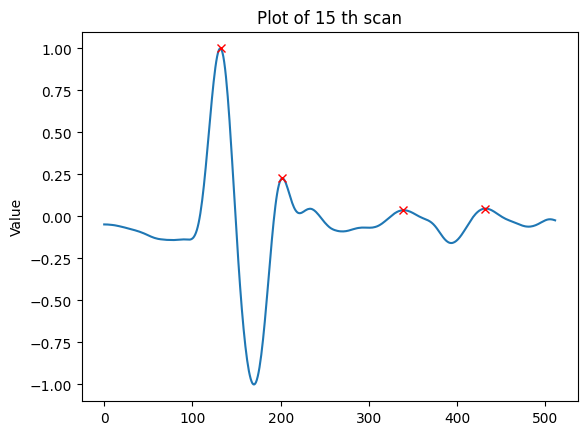

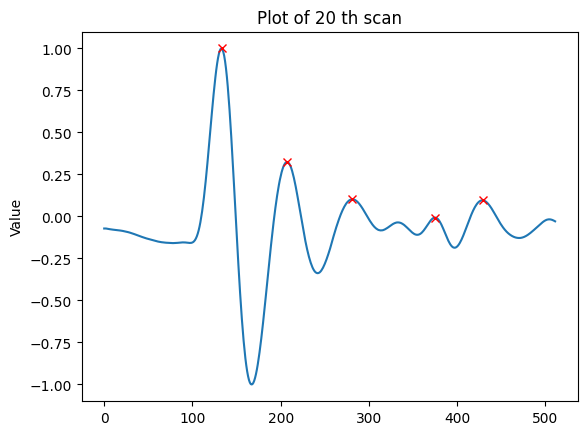

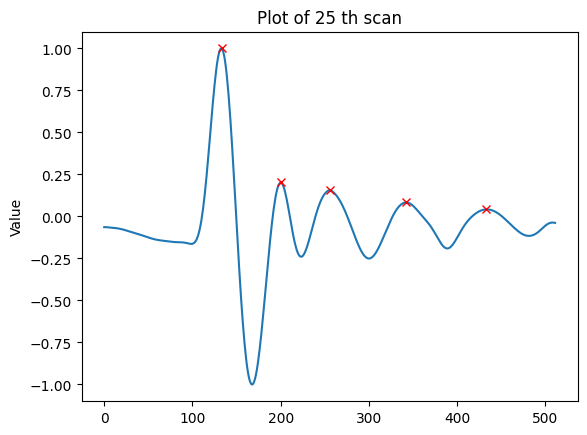

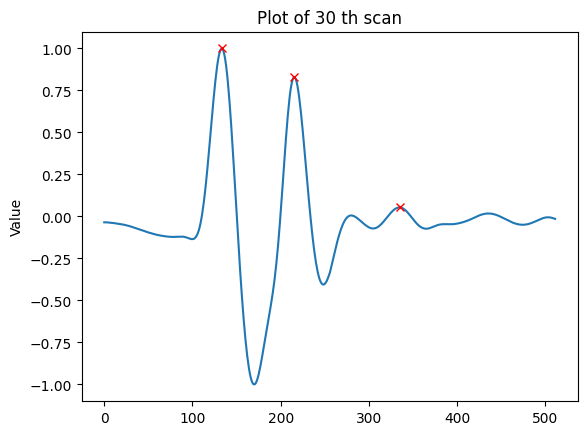

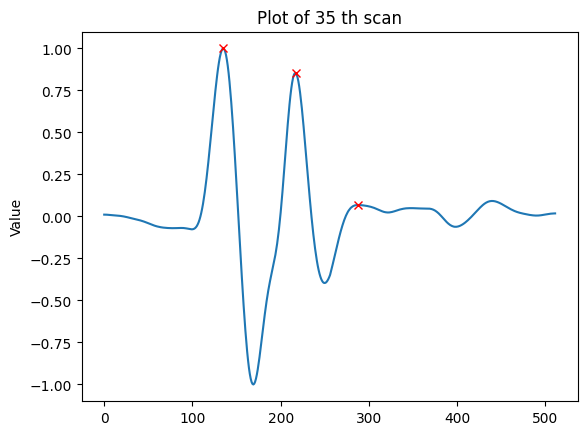

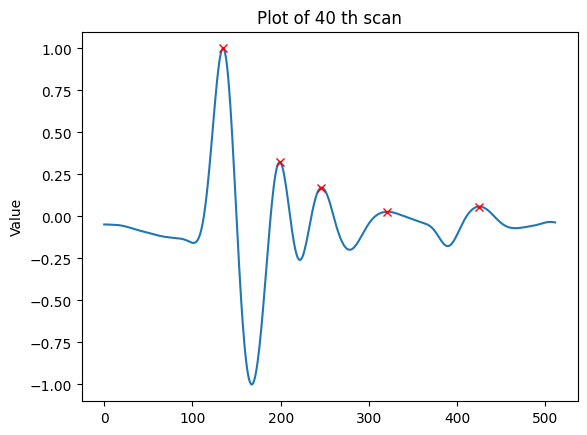

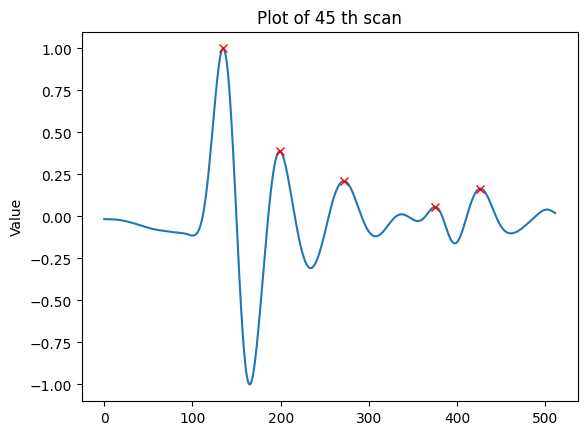

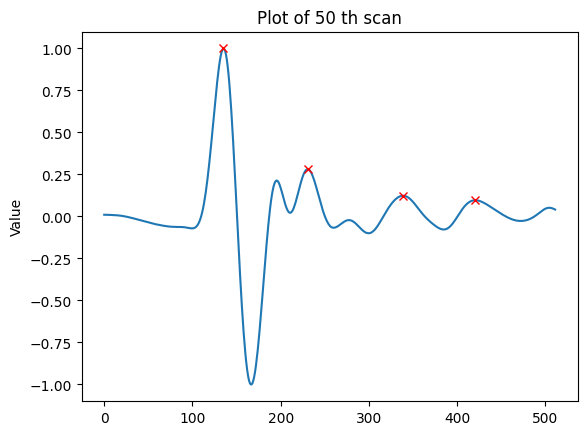

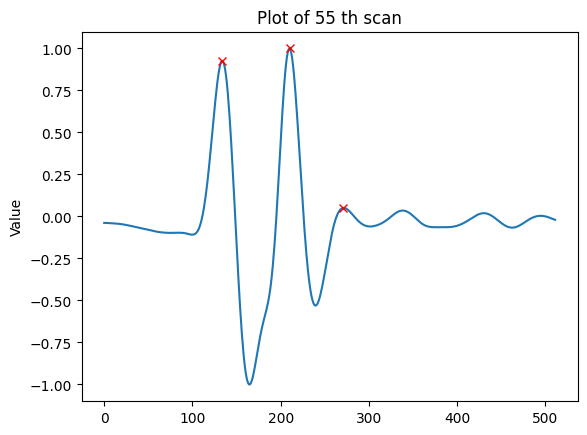

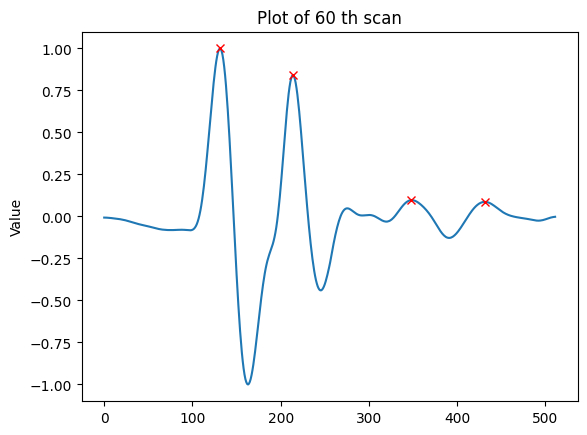

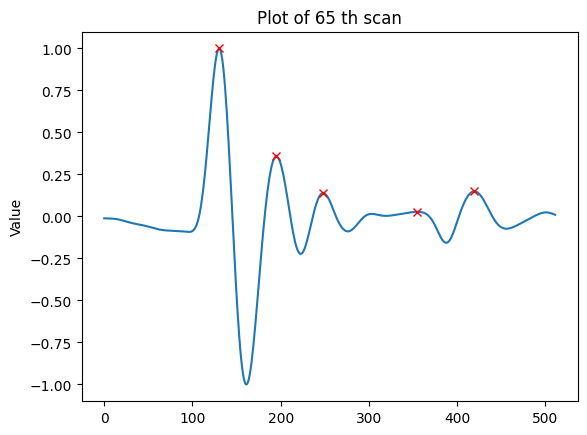

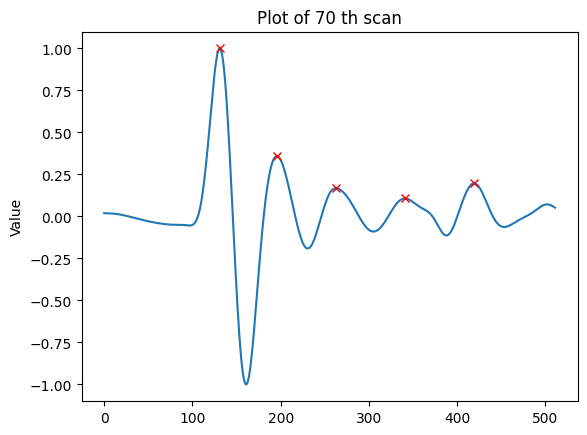

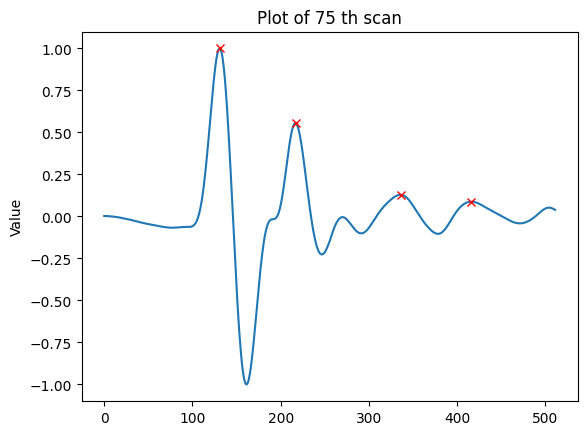

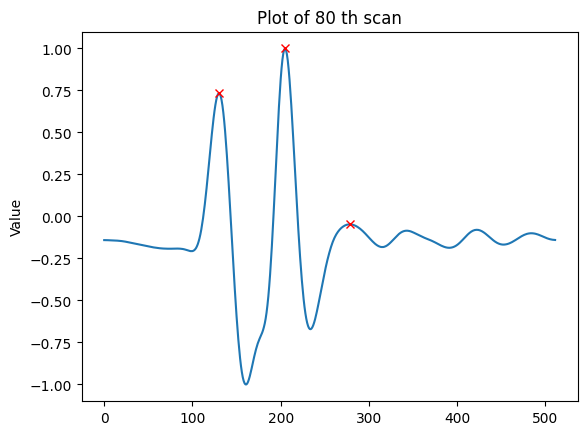

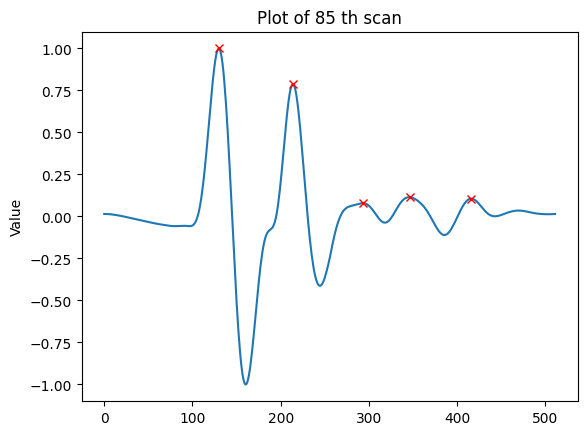

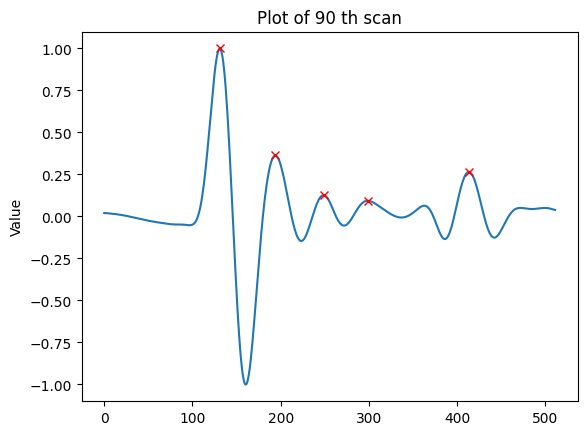

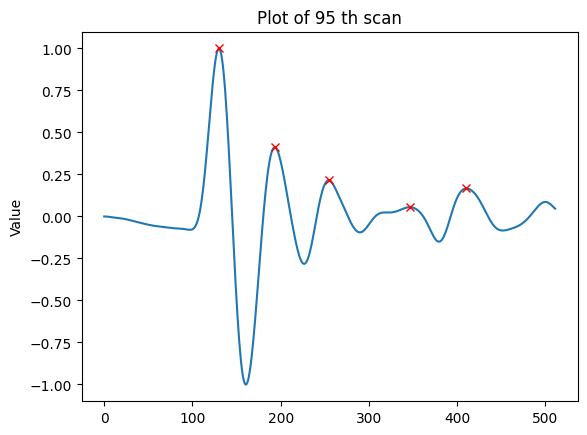

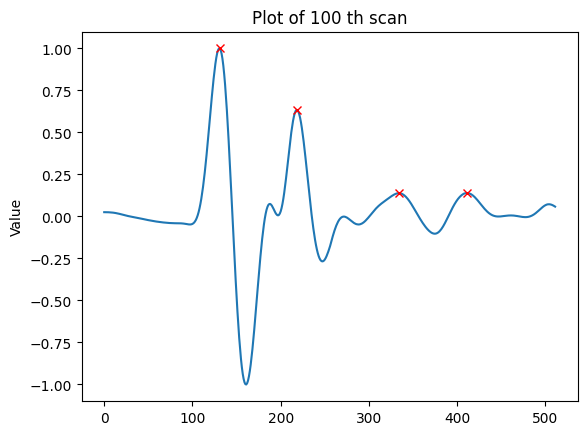

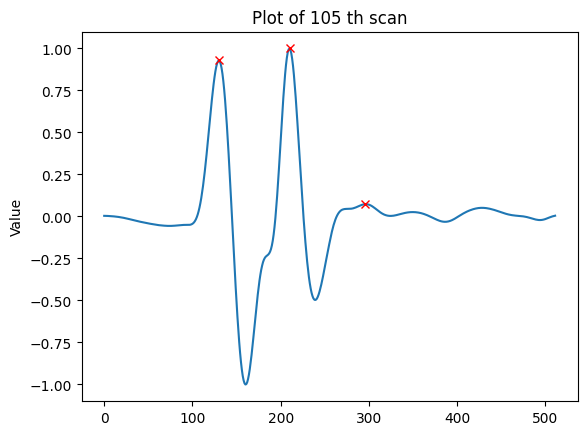

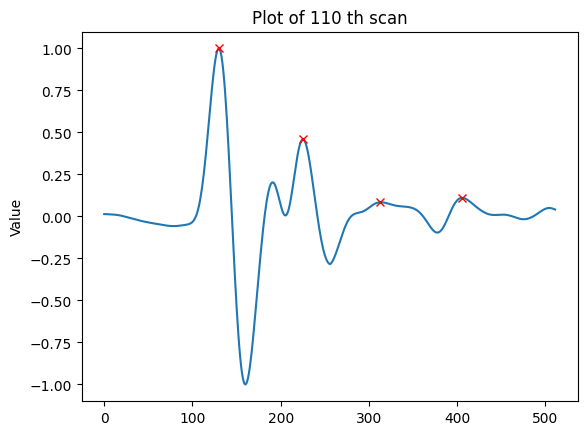

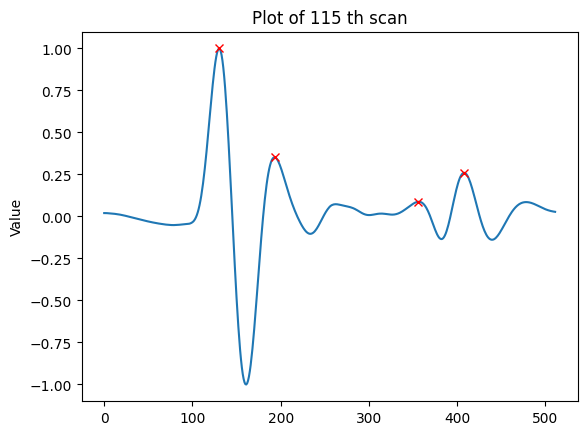

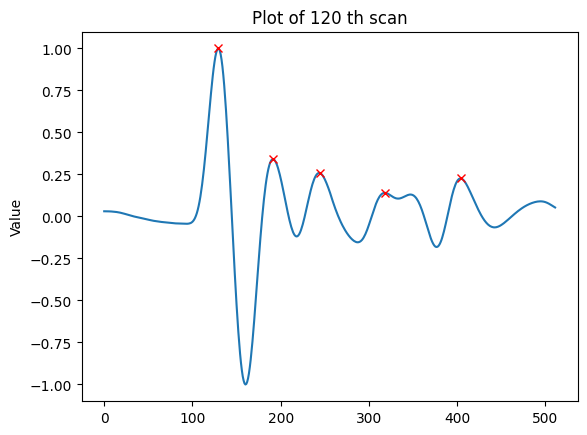

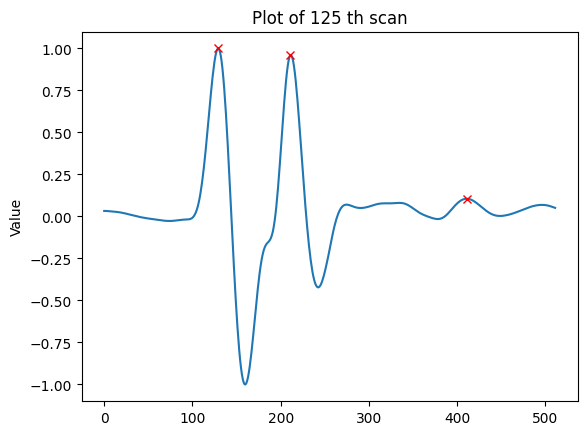

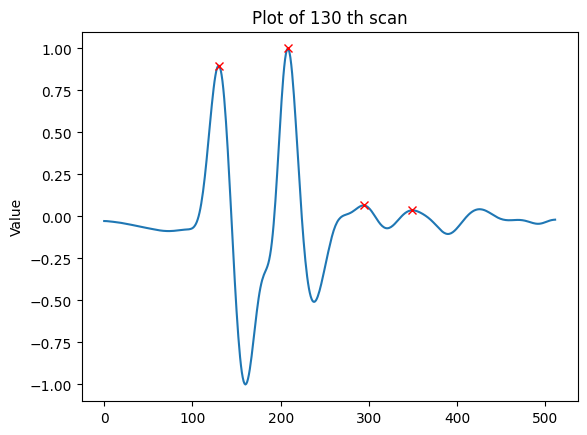

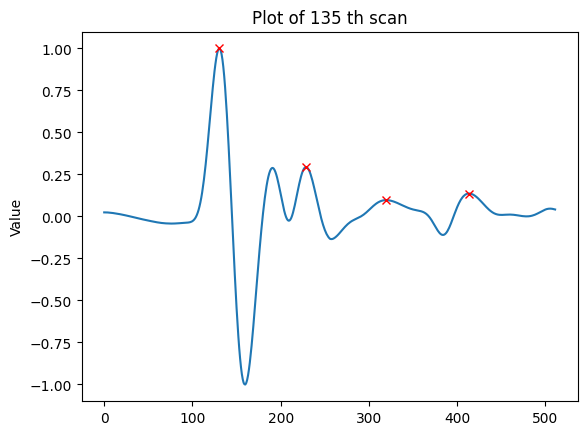

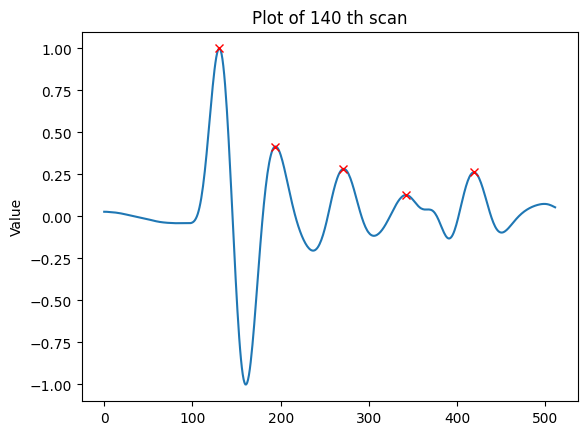

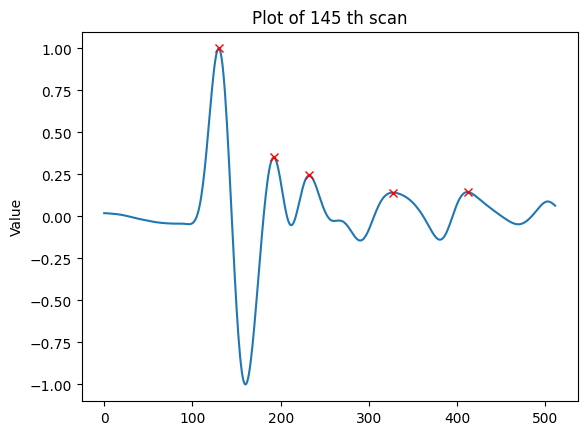

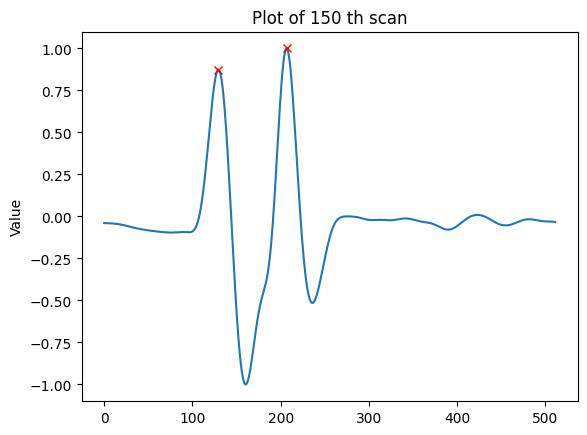

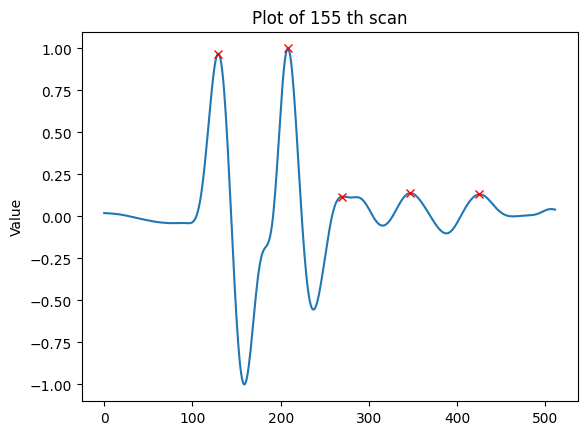

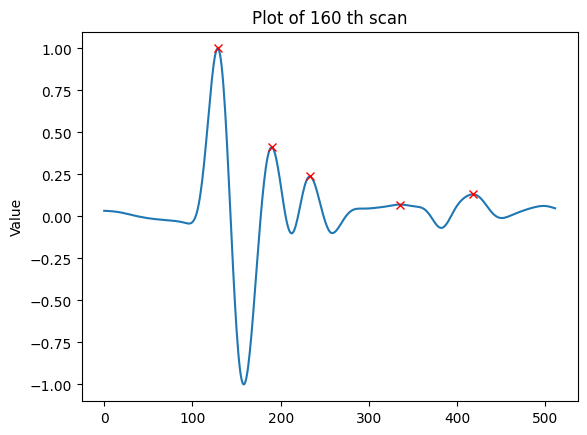

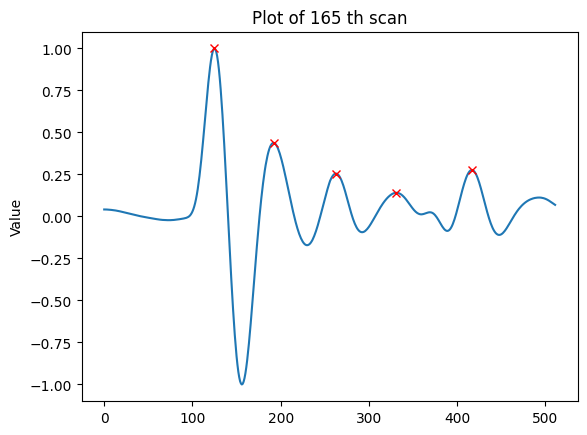

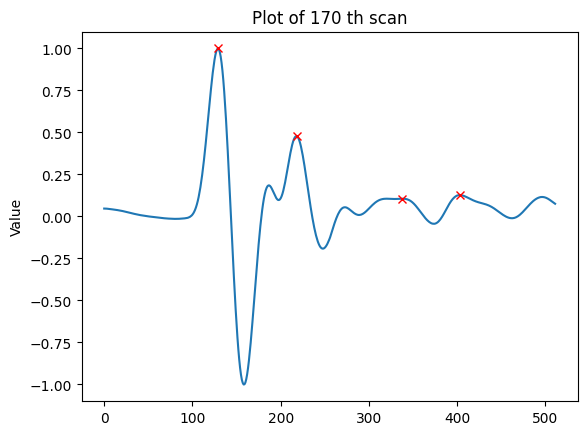

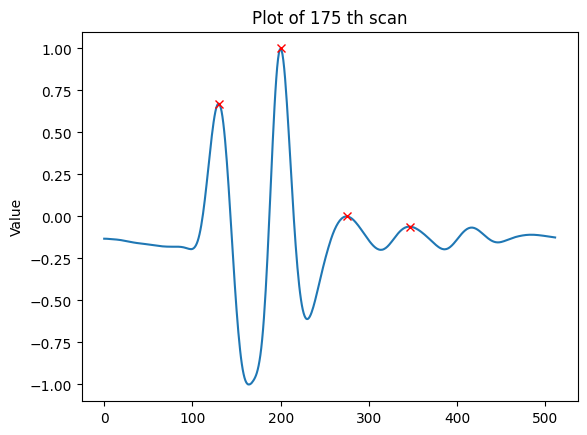

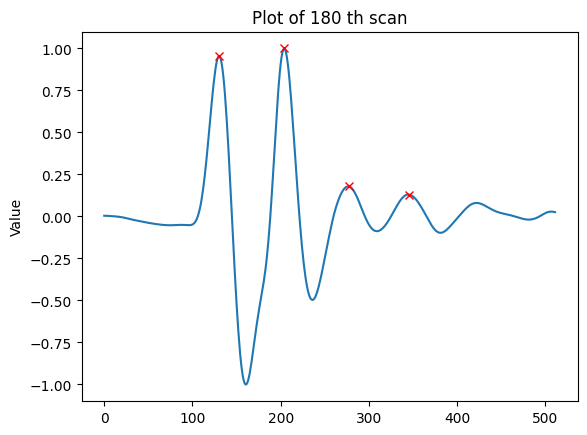

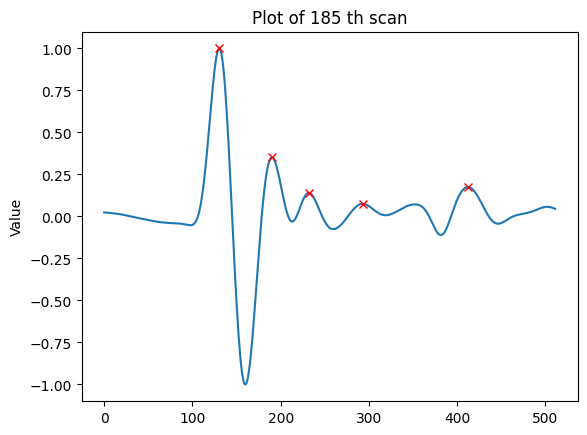

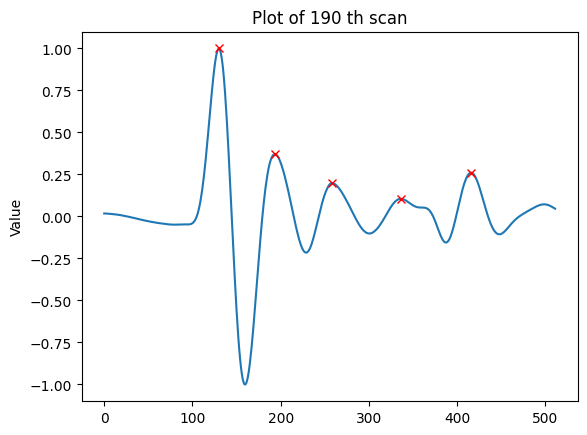

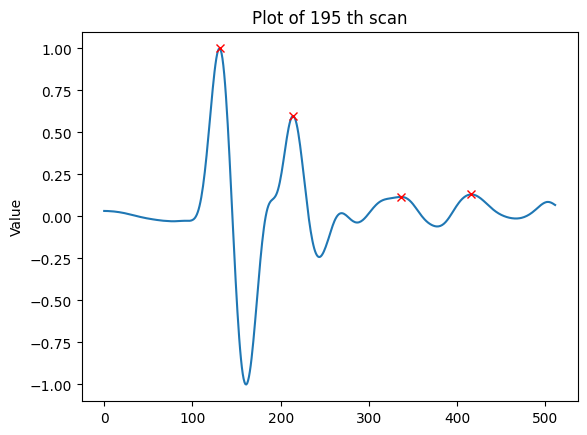

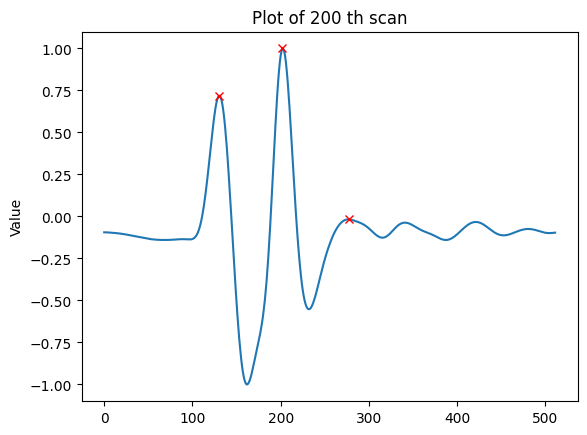

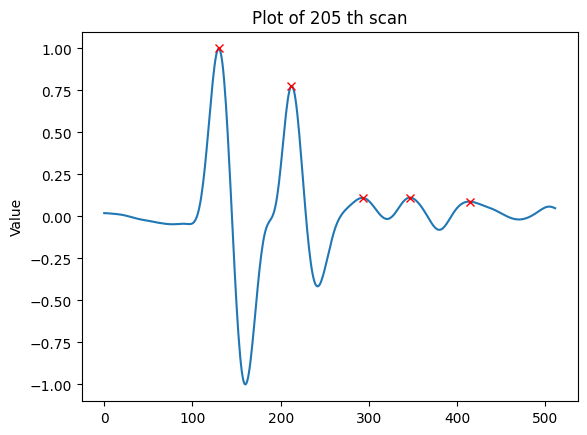

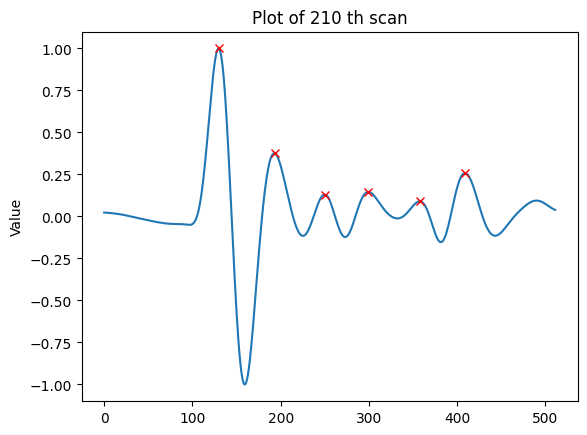

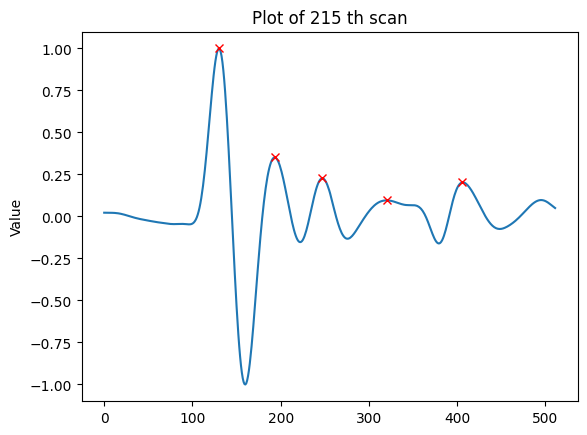

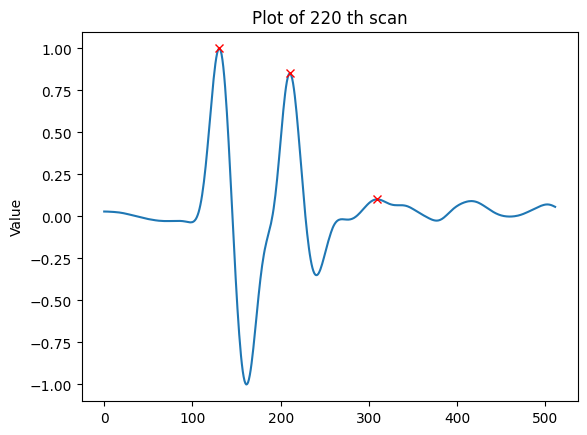

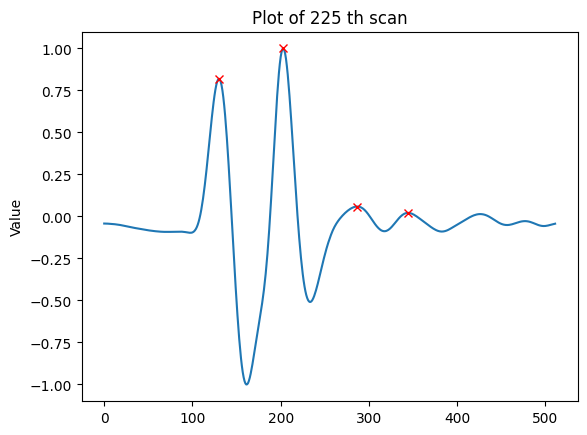

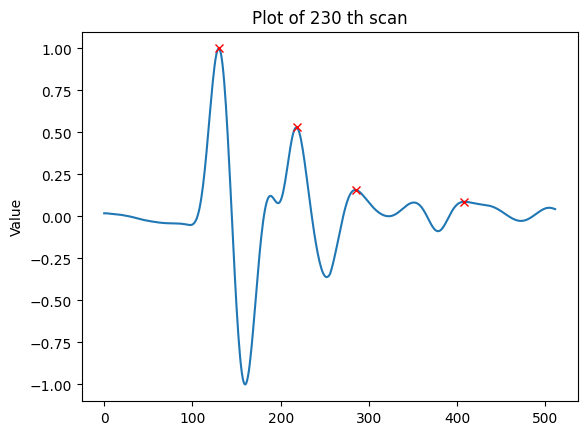

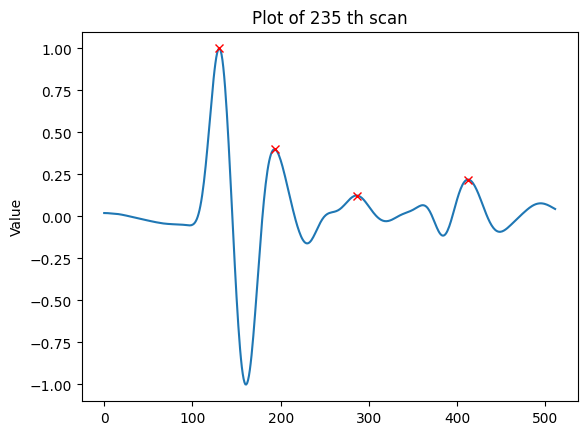

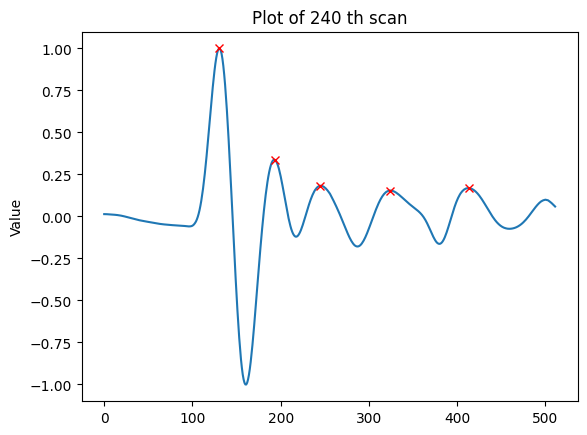

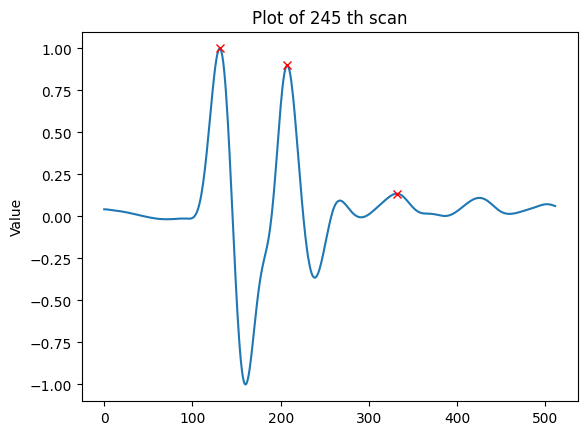

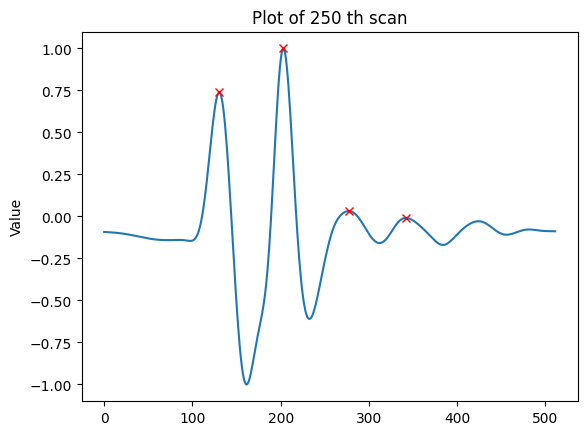

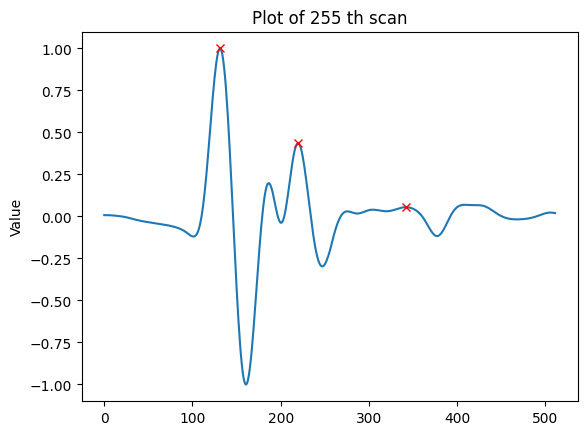

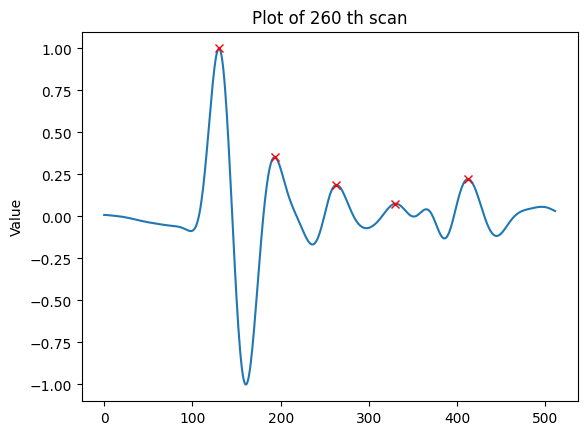

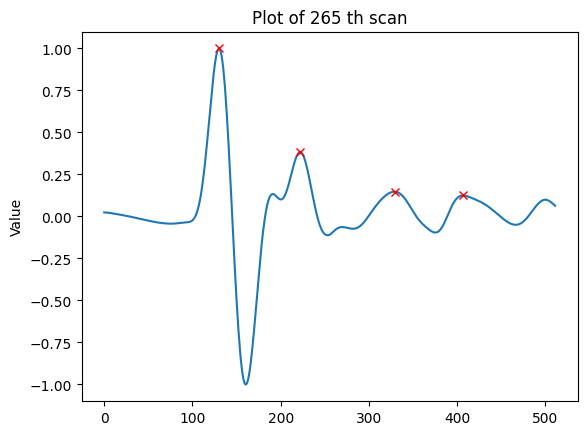

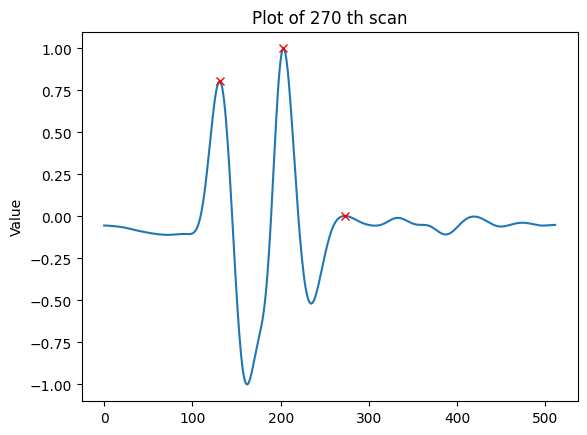

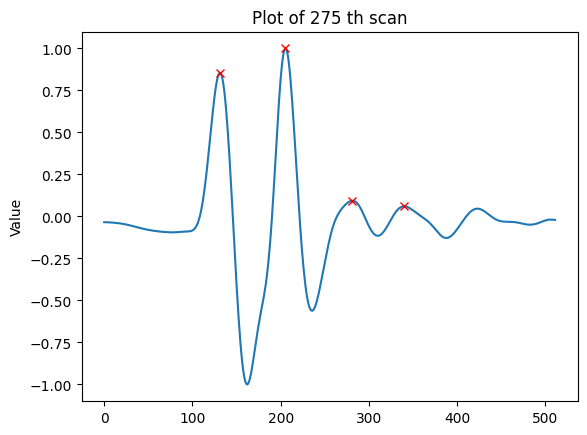

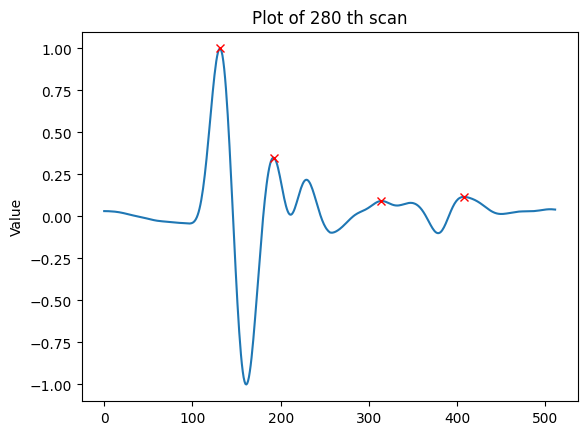

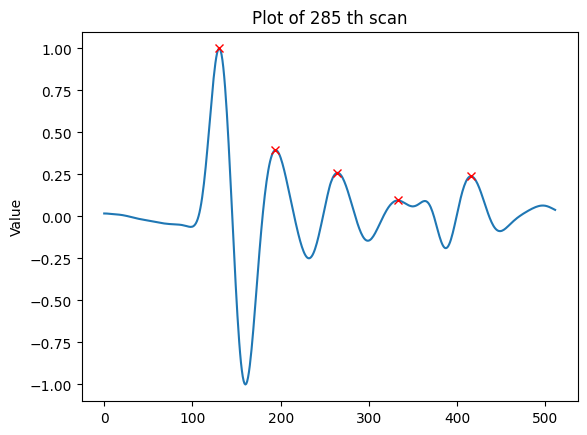

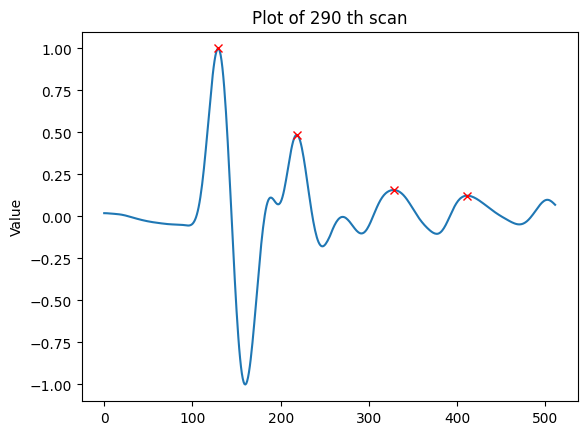

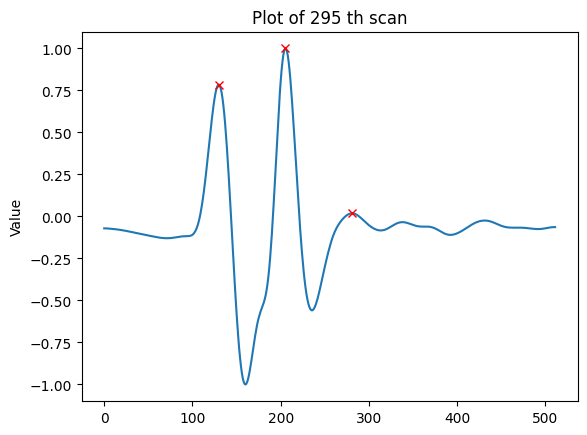

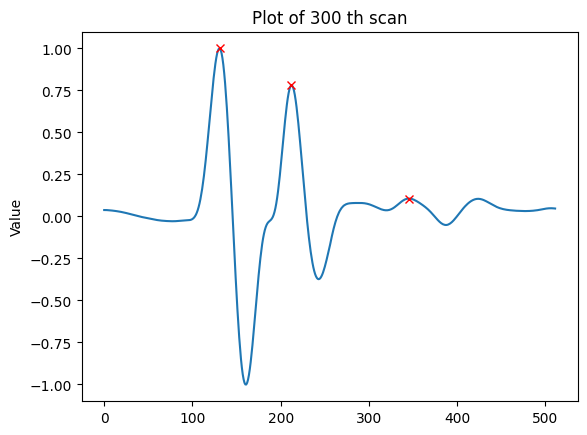

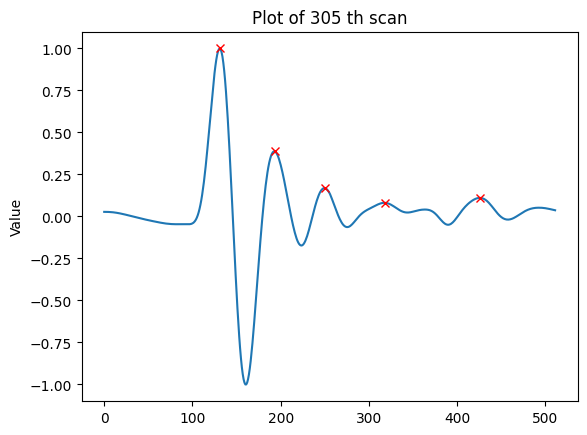

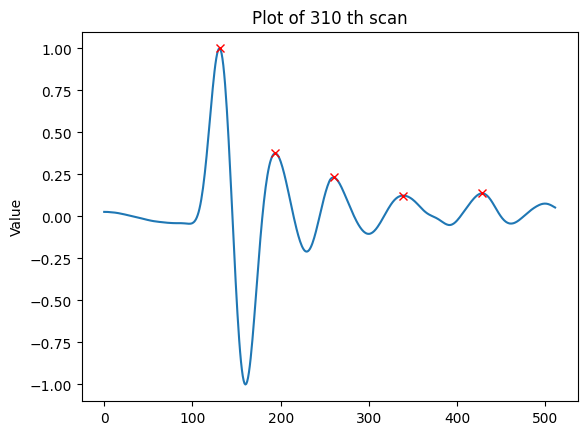

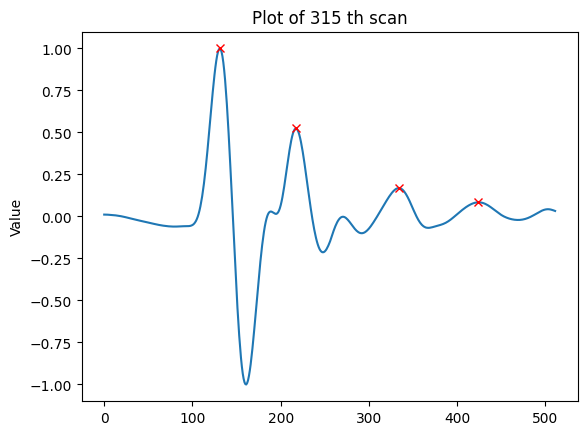

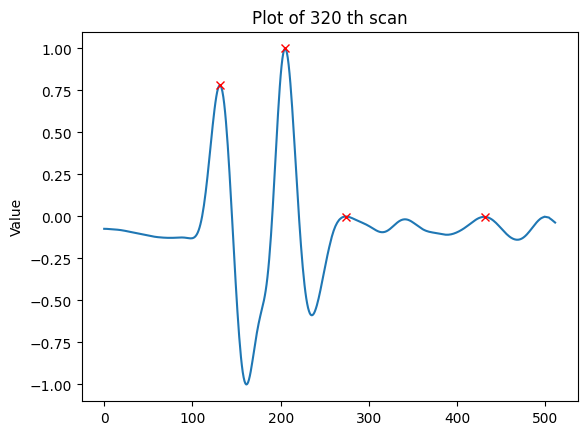

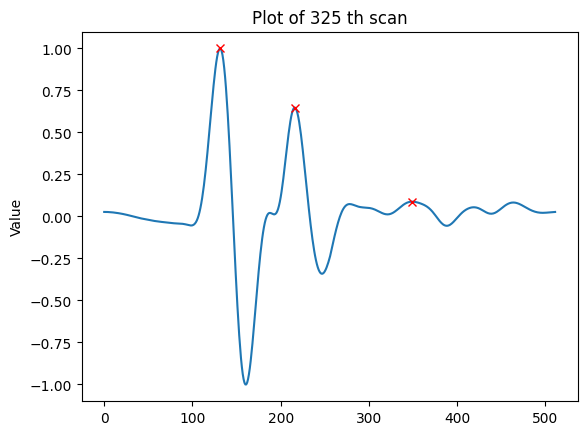

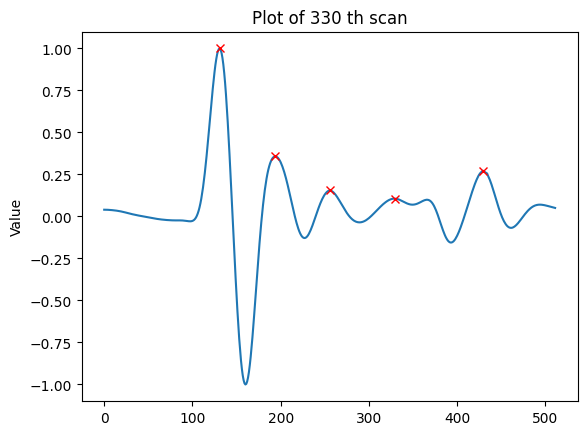

In [14]:
time0array = []
time0data = []
n = np.linspace(0, 8, df_1.shape[0])
for i in range(0, df_1.shape[1]):
    temp = df_1[i]
    temp = minmax_scale(temp, feature_range=(-1, 1))
    peaks, _ = find_peaks(temp, prominence=0.1, distance = 40)
    if i % 5 == 0:
        plt.plot(temp)
        plt.plot(peaks, temp[peaks], 'rx', label='Peaks')
        plt.ylabel('Value')
        plt.title('Plot of %i th scan' %i)
        plt.show()
    neg_peaks = []
    for peak in peaks:
        if peak > 100:
            neg_peaks.append(peak)
    time0array.append(n[neg_peaks[0]]-0.06)

start_index = next((i for i, value in enumerate(n) if value > np.mean(time0array)), None)
time0data = df_1[start_index:-1] if start_index is not None else []

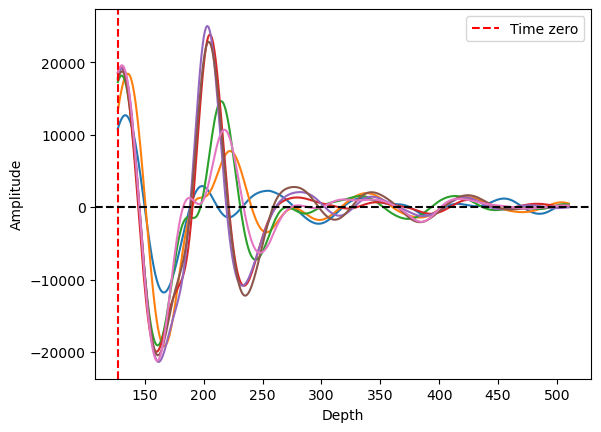

In [66]:
import matplotlib.pyplot as plt

for i in range(1, df_1.shape[1], 50):
    plt.plot(time0data[i])

plt.axvline(x=start_index, color='red', linestyle='--', label='Time zero')
plt.axhline(y=0, color='black', linestyle='--')

# Set labels and legend
plt.ylabel('Amplitude')
plt.xlabel('Depth')
plt.legend()

plt.show()


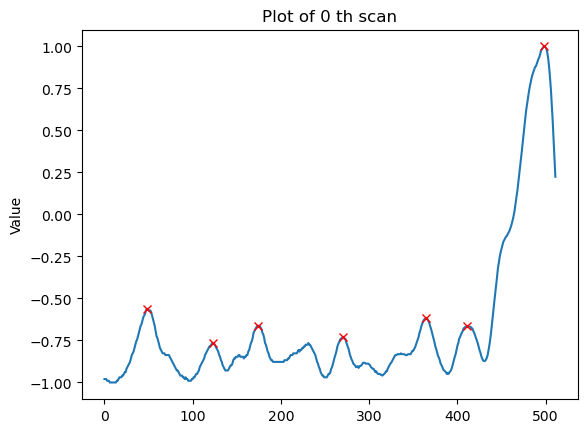

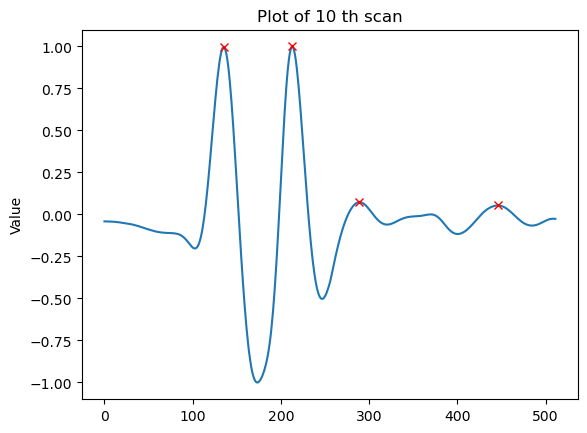

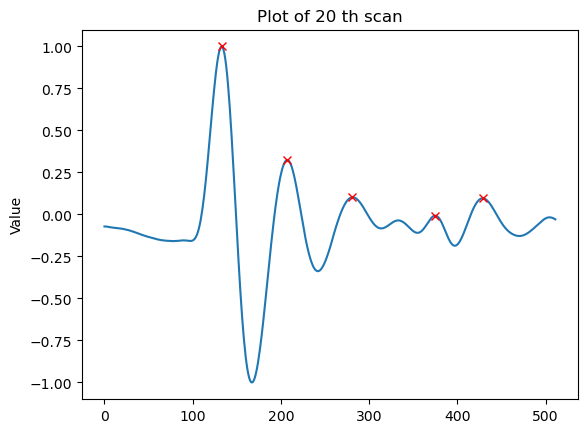

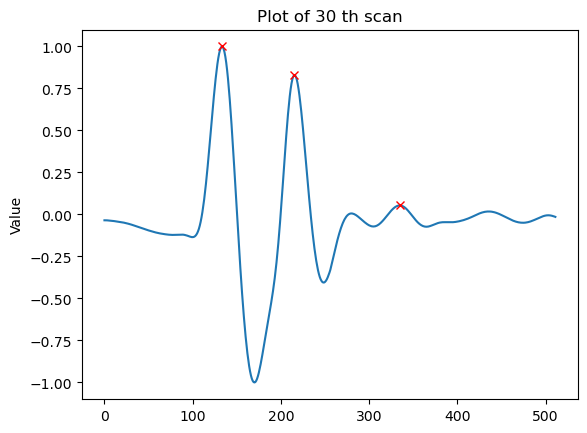

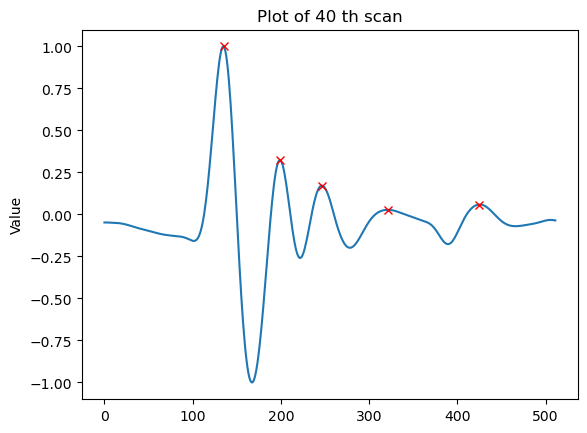

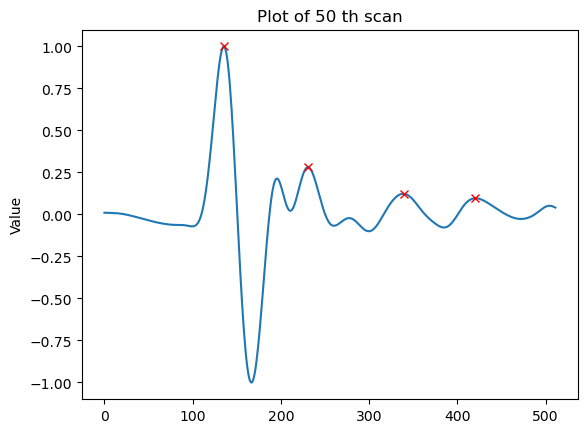

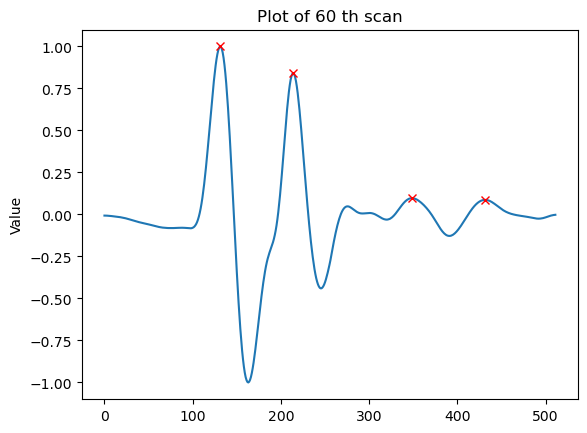

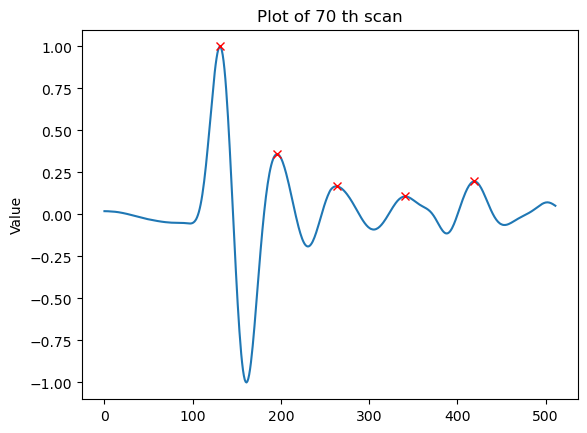

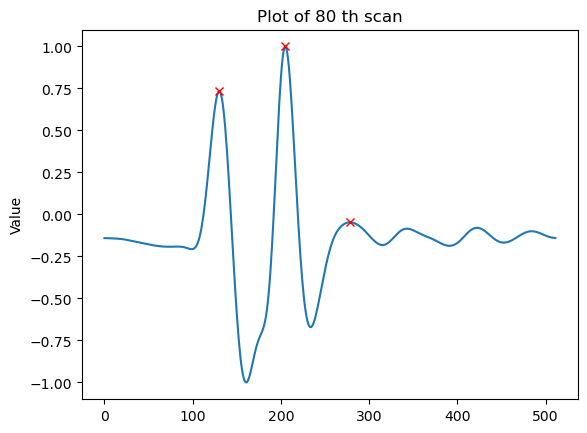

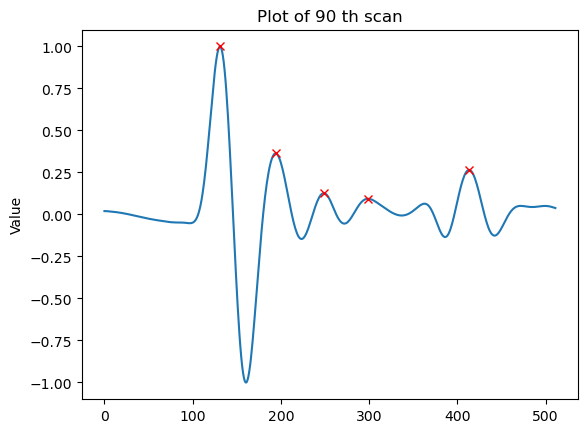

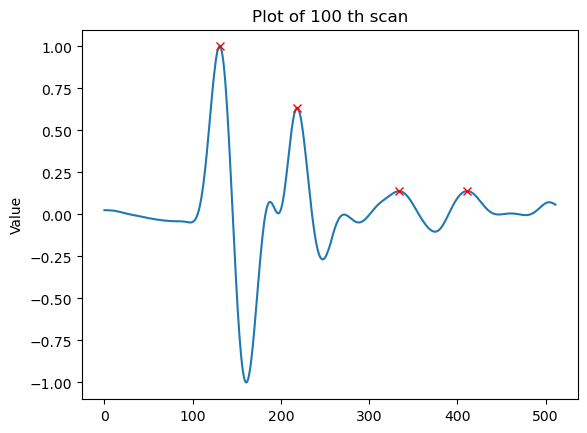

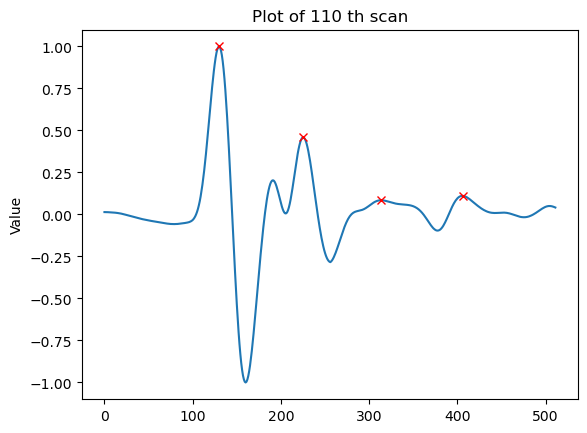

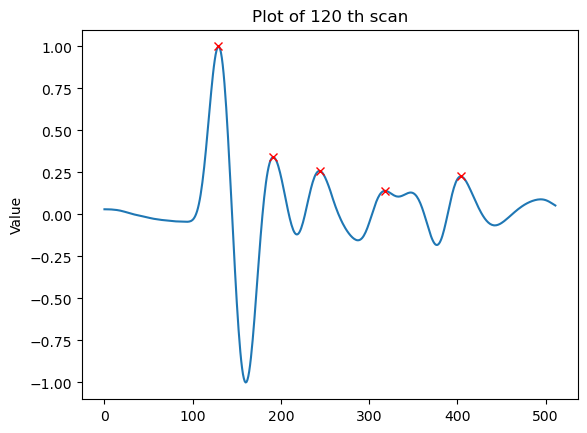

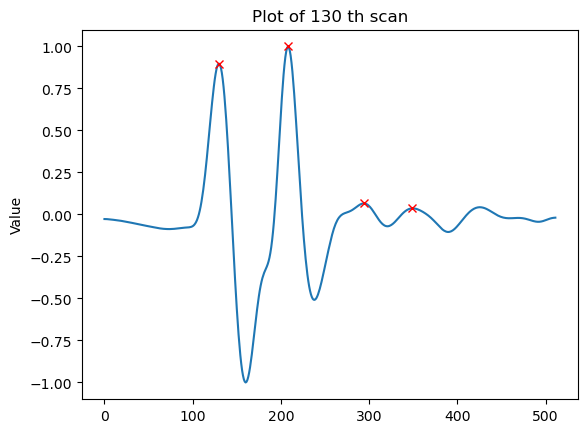

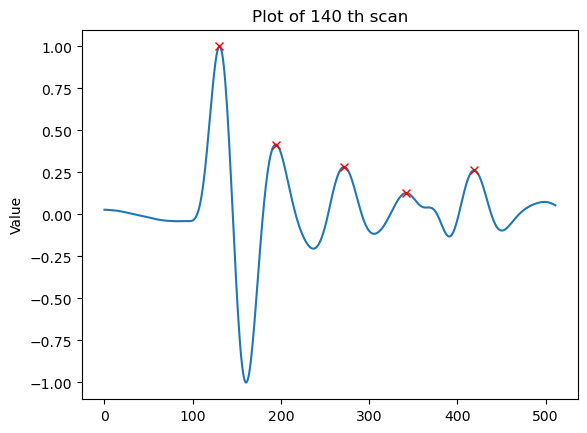

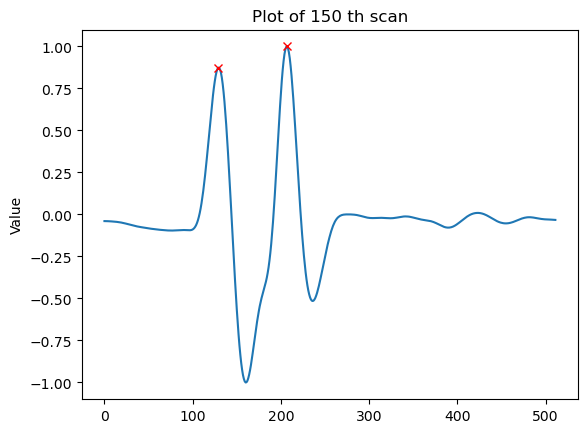

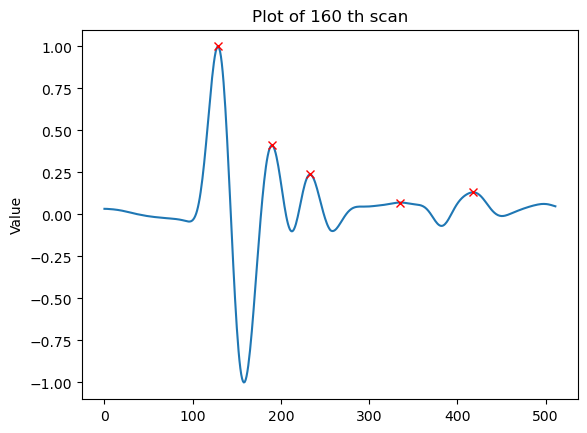

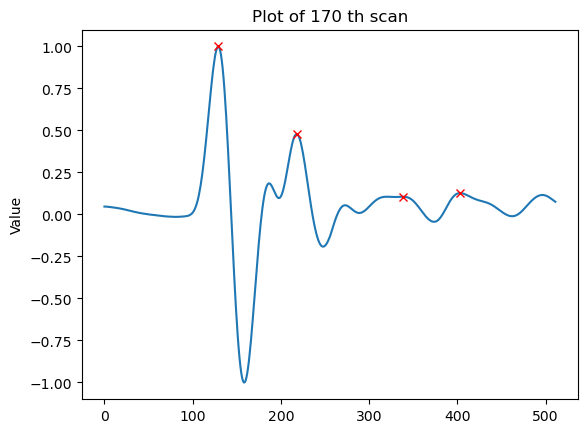

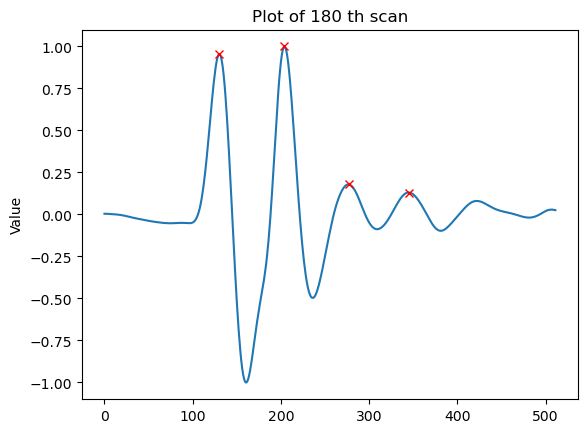

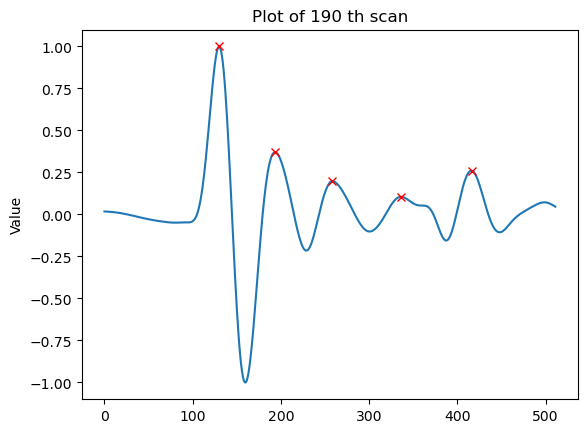

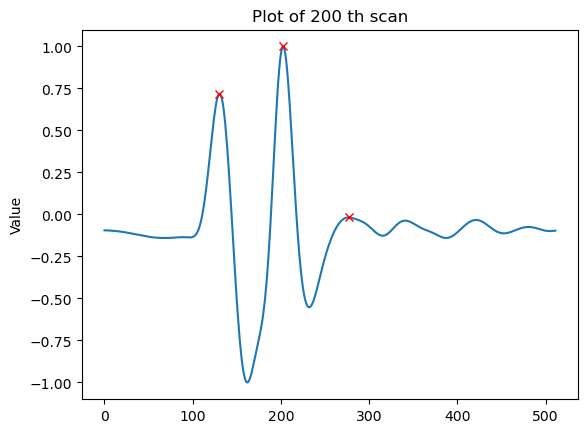

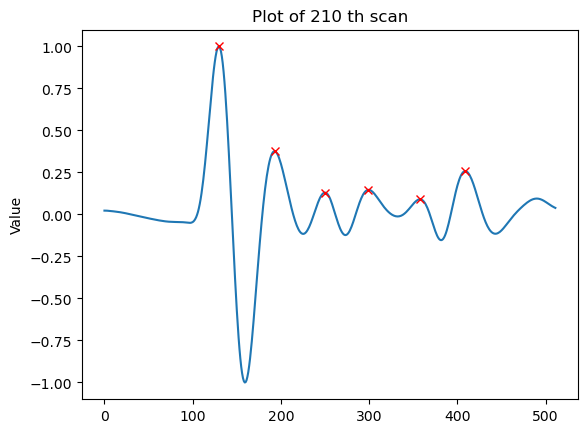

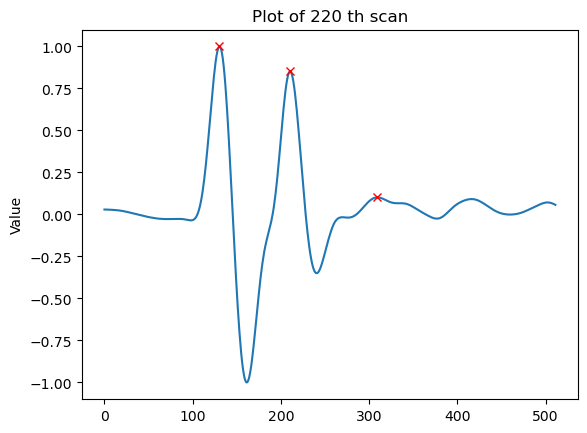

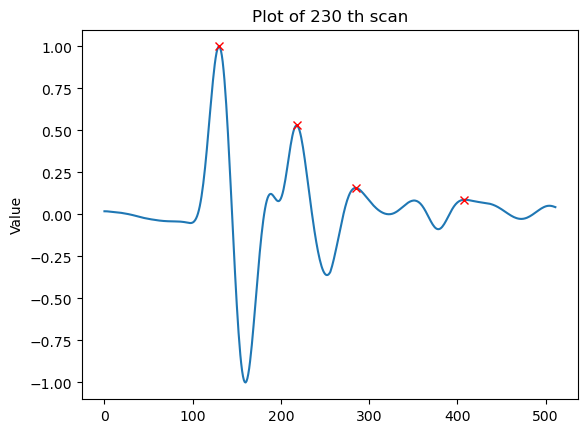

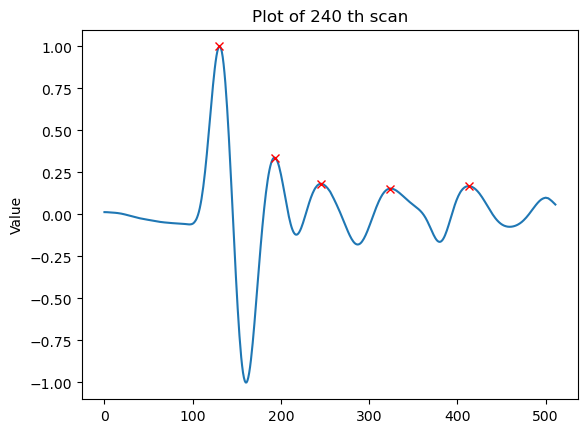

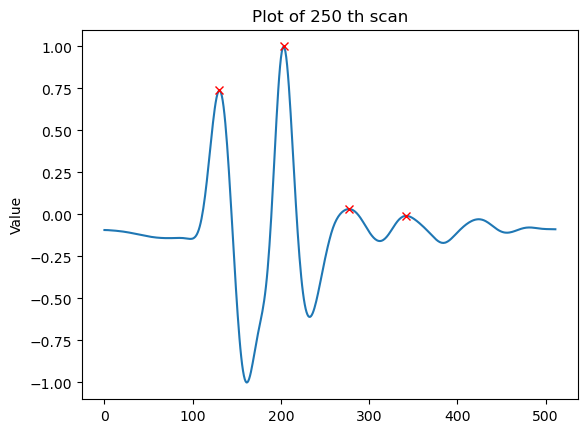

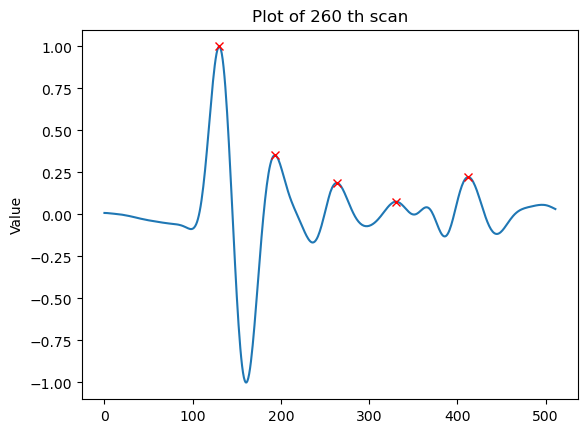

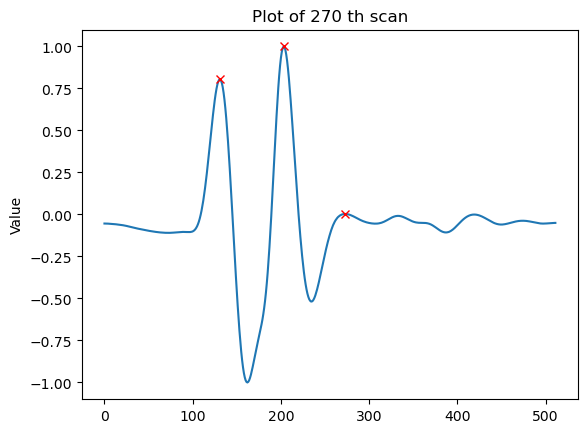

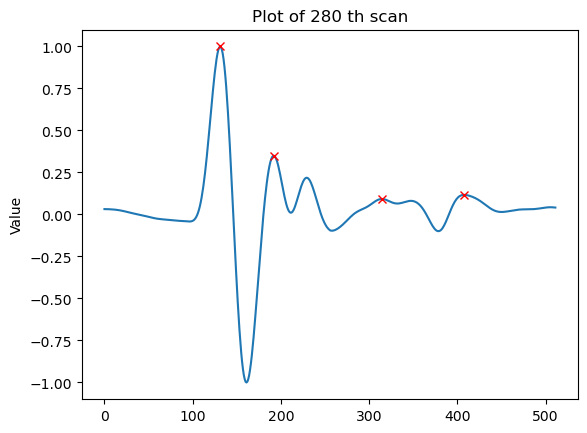

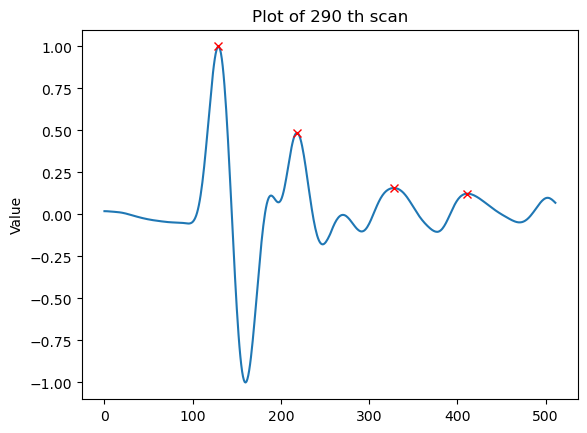

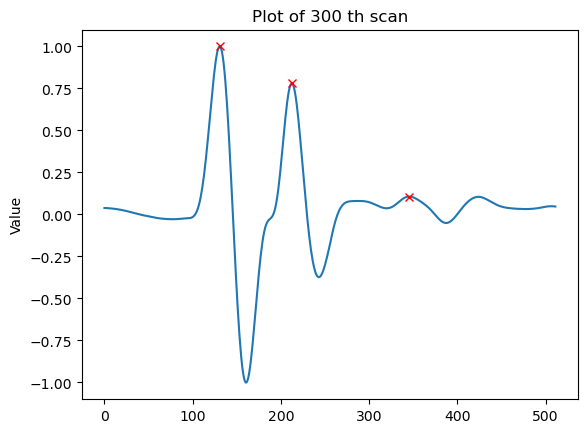

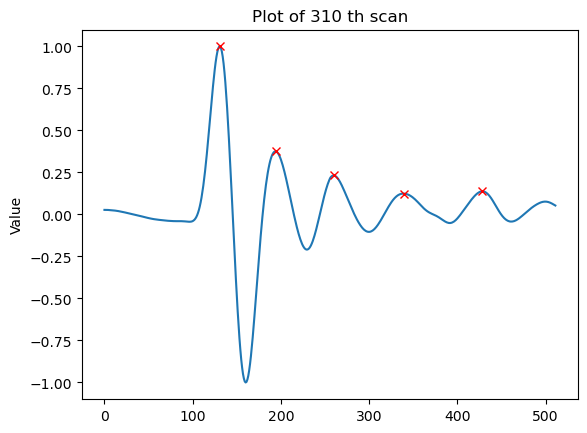

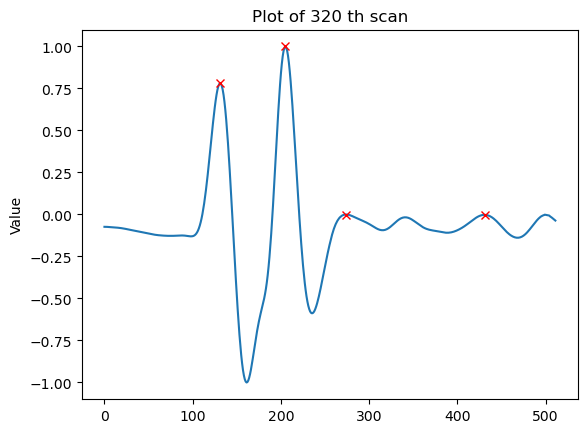

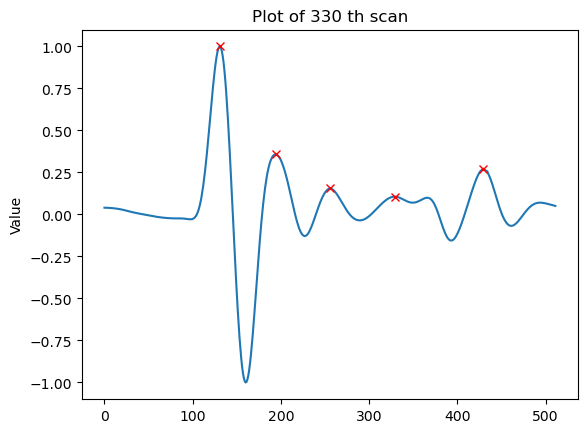

In [8]:
first_peaks_index = []
time0data_cutout = []
time0linspace = []
time0data_reindex = []

n = np.linspace(0, rhf_range, df_1.shape[0])
for i in range(0, df_1.shape[1]):
    temp = df_1[i]
    temp = minmax_scale(temp, feature_range=(-1, 1))
    peaks, _ = find_peaks(temp, prominence=0.1, distance = 40)
    if i % 10 == 0:
        plt.plot(temp)
        plt.plot(peaks, temp[peaks], 'rx', label='Peaks')
        plt.ylabel('Value')
        plt.title('Plot of %i th scan' %i)
        plt.show()
    neg_peaks = []
    for peak in peaks:
        if peak > 100:
            neg_peaks.append(peak)
    first_peaks_index.append(neg_peaks[0])
    time0linspace.append(n[neg_peaks[0]])
    time0data_cutout.append(df_1[i][neg_peaks[0]:-1])
    new_index = np.arange(-neg_peaks[0], -neg_peaks[0] + len(df_1))
    df_reindexed = (new_index, np.array(df_1[i]))
    time0data_reindex.append(df_reindexed)
    


In [10]:
time0linspace

[2.0821917808219177,
 2.0978473581213306,
 2.1135029354207435,
 2.0978473581213306,
 2.0978473581213306,
 2.0978473581213306,
 2.0978473581213306,
 2.0978473581213306,
 2.1135029354207435,
 2.1135029354207435,
 2.0978473581213306,
 2.0821917808219177,
 2.0665362035225048,
 2.0665362035225048,
 2.0665362035225048,
 2.0665362035225048,
 2.050880626223092,
 2.0665362035225048,
 2.0665362035225048,
 2.0821917808219177,
 2.0821917808219177,
 2.0821917808219177,
 2.0821917808219177,
 2.0821917808219177,
 2.0821917808219177,
 2.0821917808219177,
 2.0821917808219177,
 2.0978473581213306,
 2.0821917808219177,
 2.0821917808219177,
 2.0978473581213306,
 2.1135029354207435,
 2.1135029354207435,
 2.1135029354207435,
 2.1135029354207435,
 2.1135029354207435,
 2.0978473581213306,
 2.1135029354207435,
 2.1135029354207435,
 2.1135029354207435,
 2.1135029354207435,
 2.1135029354207435,
 2.1135029354207435,
 2.1135029354207435,
 2.1135029354207435,
 2.1135029354207435,
 2.1135029354207435,
 2.11350293542

In [ ]:
len(time0data_reindex)

In [16]:
min_value = min(first_peaks_index)
max_value = max(first_peaks_index)

print(f"Minimum value: {min_value}")
print(f"Maximum value: {max_value}")

Minimum value: 123
Maximum value: 135


In [ ]:
df_1.shape[1]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


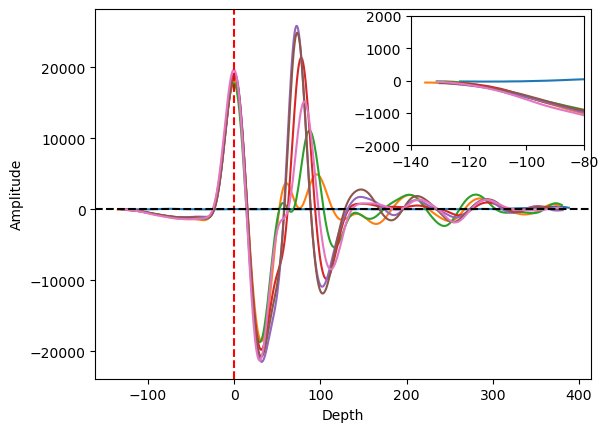

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Create a figure and axis
fig, ax = plt.subplots()

# Plotting data for specific coordinates
for i in range(0, df_1.shape[1], 50):
    ax.plot(time0data_reindex[i][0], time0data_reindex[i][1])

# Adding vertical and horizontal dashed lines
ax.axvline(x=0, color='red', linestyle='--')
ax.axhline(y=0, color='black', linestyle='--')

# Set labels and legend for the main plot
ax.set_ylabel('Amplitude')
ax.set_xlabel('Depth')
ax.legend()


# Create an inset axis to zoom in on a specific portion
axins = inset_axes(ax, width="35%", height="35%", loc='upper right')

# Plot the same data on the inset axis
for i in range(0, df_1.shape[1], 50):
    axins.plot(time0data_reindex[i][0], time0data_reindex[i][1])

# Set x and y-axis limits for the inset axis
axins.set_xlim(-140, -80)  
axins.set_ylim(-2000, 2000) 

plt.show()


In [ ]:
max_val=np.max(time0plot[i][0])
min_val=np.min(time0plot[i][0])
common_range = np.arange(-min(time0index), -min(time0index) + 512 + 1)

In [ ]:
x=[]
y=[]
for i in range (0, df_1.shape[1]-1, 1):
    x.append(time0plot[i][0])
    y.append(time0plot[i][1])

In [53]:
time0data_reindex[0][0].shape

(512,)

In [ ]:
common_range = np.arange(max(map(min, x)), min(map(max, x)) + 1)

In [ ]:
common_range

In [ ]:
x[0].shape

In [ ]:
df_temp = pd.DataFrame({'X': x[0], 'Y': y[0]})

In [ ]:
df_temp

In [ ]:
df_temp_common_range = df_temp[df_temp['X'].isin(common_range)]

In [ ]:
df_temp_common_range

In [ ]:
np.array(df_temp_common_range['Y']).shape

In [10]:
x=[]
y=[]
for i in range (0, df_1.shape[1], 1):
    x.append(time0data_reindex[i][0])
    y.append(time0data_reindex[i][1])
common_range = np.arange(max(map(min, x)), min(map(max, x)) + 1)
adjusted_time0data = []
for i in range (0, df_1.shape[1]-1, 1):
    df_temp = pd.DataFrame({'X': x[i], 'Y': y[i]})
    df_temp_common_range = df_temp[df_temp['X'].isin(common_range)]
    adjusted_time0data.append(np.array(df_temp_common_range['Y']))
adjusted_time0data = pd.DataFrame(adjusted_time0data)

In [11]:
adjusted_time0data_t = adjusted_time0data.transpose()

In [12]:
adjusted_time0data_t

0      1      2      3      4      5      6      7      8      9    \
0    -22.0  -58.0 -152.0  -46.0 -132.0 -120.0  -92.0  -82.0  -64.0  -78.0   
1    -22.0  -62.0 -156.0  -54.0 -134.0 -126.0  -98.0  -88.0  -70.0  -82.0   
2    -22.0  -66.0 -160.0  -62.0 -140.0 -134.0 -106.0  -96.0  -76.0  -88.0   
3    -24.0  -72.0 -164.0  -70.0 -144.0 -138.0 -112.0 -106.0  -84.0  -94.0   
4    -24.0  -80.0 -168.0  -80.0 -148.0 -144.0 -122.0 -114.0  -92.0 -100.0   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
495  362.0  353.0  199.0  166.0  436.0  598.0  754.0  802.0  679.0  370.0   
496  363.0  384.0  220.0  170.0  413.0  560.0  704.0  766.0  661.0  363.0   
497  365.0  403.0  233.0  169.0  387.0  518.0  650.0  722.0  632.0  349.0   
498  366.0  412.0  239.0  166.0  358.0  474.0  592.0  671.0  597.0  329.0   
499  366.0  409.0  239.0  159.0  328.0  429.0  533.0  615.0  554.0  306.0   

     ...     321    322    323    324   325    326    327    328    329    330  
0    ...   -72.0  -96.0  -74.0 -100.0 -40.0 -102.0 -116.0 -142.0 -112.0  -84.0  
1    ...   -80.0 -104.0  -82.0 -108.0 -50.0 -108.0 -126.0 -150.0 -120.0  -94.0  
2    ...   -86.0 -114.0  -92.0 -114.0 -60.0 -114.0 -138.0 -160.0 -130.0 -104.0  
3    ...   -94.0 -124.0 -102.0 -124.0 -72.0 -122.0 -150.0 -170.0 -138.0 -114.0  
4    ...  -104.0 -134.0 -112.0 -132.0 -86.0 -128.0 -164.0 -180.0 -148.0 -128.0  
..   ...     ...    ...    ...    ...   ...    ...    ...    ...    ...    ...  
495  ...  1178.0  784.0  316.0  -12.0 -71.0   14.0  189.0  248.0  328.0  391.0  
496  ...  1087.0  709.0  270.0  -25.0 -62.0   32.0  206.0  248.0  313.0  362.0  
497  ...   992.0  636.0  230.0  -34.0 -52.0   46.0  216.0  244.0  295.0  333.0  
498  ...   896.0  566.0  192.0  -40.0 -43.0   57.0  221.0  236.0  276.0  304.0  
499  ...   801.0  499.0  161.0  -44.0 -34.0   64.0  221.0  225.0  255.0  275.0  

[500 rows x 331 columns]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


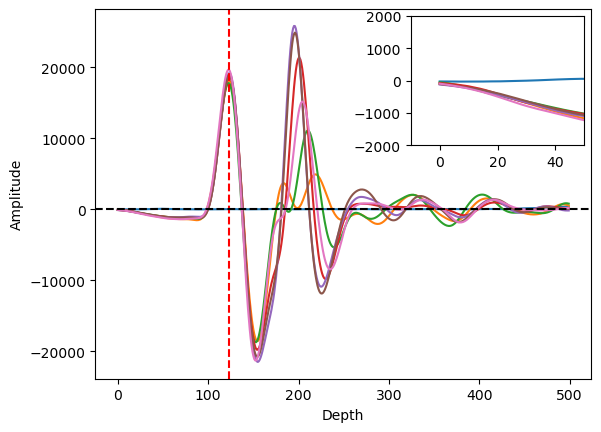

In [13]:
# Create a figure and axis
fig, ax = plt.subplots()

# Plotting data for specific coordinates
for i in range(0, df_1.shape[1], 50):
    ax.plot(adjusted_time0data.transpose()[i])

# Adding vertical and horizontal dashed lines
peaks, _ = find_peaks(adjusted_time0data_t[i], prominence=0.1, distance = 40)

ax.axvline(x=peaks[0], color='red', linestyle='--')
ax.axhline(y=0, color='black', linestyle='--')

# Set labels and legend for the main plot
ax.set_ylabel('Amplitude')
ax.set_xlabel('Depth')
ax.legend()


# Create an inset axis to zoom in on a specific portion
axins = inset_axes(ax, width="35%", height="35%", loc='upper right')

# Plot the same data on the inset axis
for i in range(0, df_1.shape[1], 50):
    axins.plot(adjusted_time0data.transpose()[i])

# Set x and y-axis limits for the inset axis
axins.set_xlim(-10, 50)  
axins.set_ylim(-2000, 2000) 

plt.show()


In [15]:
adjusted_time0data_t

0      1      2      3      4      5      6      7      8      9    \
0    -52.0 -142.0  -32.0 -122.0 -104.0  -80.0  -70.0  -52.0  -70.0  -80.0   
1    -54.0 -148.0  -40.0 -126.0 -112.0  -86.0  -76.0  -58.0  -72.0  -86.0   
2    -58.0 -152.0  -46.0 -132.0 -120.0  -92.0  -82.0  -64.0  -78.0  -90.0   
3    -62.0 -156.0  -54.0 -134.0 -126.0  -98.0  -88.0  -70.0  -82.0  -96.0   
4    -66.0 -160.0  -62.0 -140.0 -134.0 -106.0  -96.0  -76.0  -88.0 -102.0   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
497  353.0  199.0  166.0  436.0  598.0  754.0  802.0  679.0  370.0  116.0   
498  384.0  220.0  170.0  413.0  560.0  704.0  766.0  661.0  363.0  120.0   
499  403.0  233.0  169.0  387.0  518.0  650.0  722.0  632.0  349.0  121.0   
500  412.0  239.0  166.0  358.0  474.0  592.0  671.0  597.0  329.0  119.0   
501  409.0  239.0  159.0  328.0  429.0  533.0  615.0  554.0  306.0  114.0   

     ...    321    322    323   324    325    326    327    328    329    330  
0    ...  -78.0  -58.0  -88.0 -24.0  -88.0  -96.0 -124.0  -96.0  -68.0 -124.0  
1    ...  -86.0  -64.0  -94.0 -32.0  -96.0 -106.0 -132.0 -104.0  -76.0 -132.0  
2    ...  -96.0  -74.0 -100.0 -40.0 -102.0 -116.0 -142.0 -112.0  -84.0 -142.0  
3    ... -104.0  -82.0 -108.0 -50.0 -108.0 -126.0 -150.0 -120.0  -94.0 -152.0  
4    ... -114.0  -92.0 -114.0 -60.0 -114.0 -138.0 -160.0 -130.0 -104.0 -162.0  
..   ...    ...    ...    ...   ...    ...    ...    ...    ...    ...    ...  
497  ...  784.0  316.0  -12.0 -71.0   14.0  189.0  248.0  328.0  391.0  450.0  
498  ...  709.0  270.0  -25.0 -62.0   32.0  206.0  248.0  313.0  362.0  413.0  
499  ...  636.0  230.0  -34.0 -52.0   46.0  216.0  244.0  295.0  333.0  376.0  
500  ...  566.0  192.0  -40.0 -43.0   57.0  221.0  236.0  276.0  304.0  339.0  
501  ...  499.0  161.0  -44.0 -34.0   64.0  221.0  225.0  255.0  275.0  304.0  

[502 rows x 331 columns]

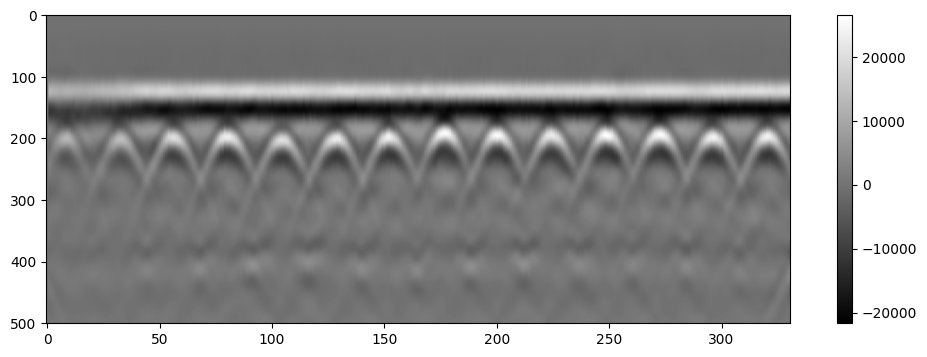

In [22]:
fig, ax = plt.subplots(figsize=(12, 4))
heatmap = ax.imshow(adjusted_time0data_t, cmap='gray', aspect='auto')

ax.set_ylim(adjusted_time0data_t.shape[0], 0)

cbar = plt.colorbar(heatmap)

plt.savefig('H:/GPR_work/scan_by_scan_time_zero.png')
plt.show()

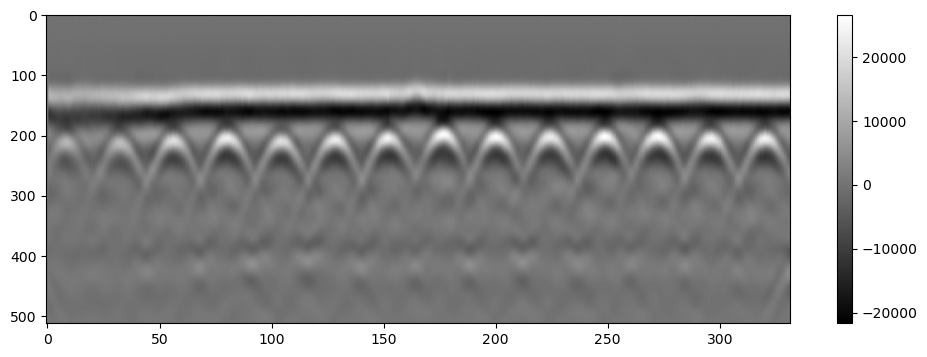

In [30]:
fig, ax = plt.subplots(figsize=(12, 4))
heatmap = ax.imshow(df_1, cmap='gray', aspect='auto')

ax.set_ylim(df_1.shape[0], 0)

cbar = plt.colorbar(heatmap)

plt.savefig('H:/GPR_work/without_time_zero.png')
plt.show()

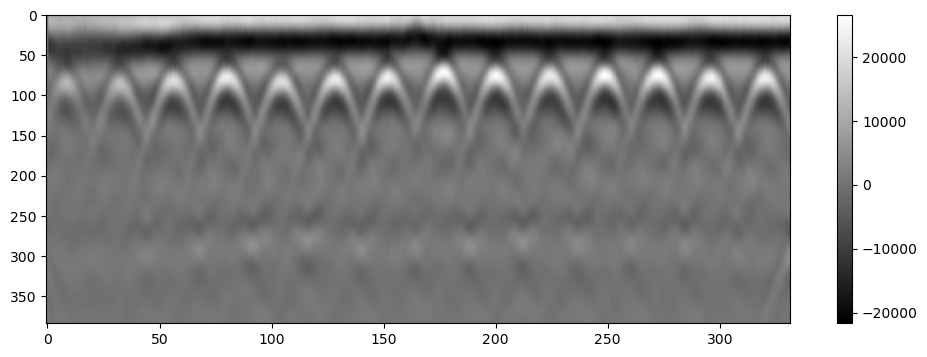

In [25]:
fig, ax = plt.subplots(figsize=(12, 4))
heatmap = ax.imshow(time0data, cmap='gray', aspect='auto')

ax.set_ylim(time0data.shape[0], 0)

cbar = plt.colorbar(heatmap)

plt.savefig('H:/GPR_work/mean_time_zero.png')
plt.show()

In [ ]:
numpy_array.shape

In [ ]:
max_length

In [ ]:
x=np.linspace(0,8,16, retstep=True)

In [ ]:
x[1]


In [18]:
def fkMigration(data, rhf_spm, rhf_sps, rhf_range, rh_nsamp, rhf_espr):
    if rhf_spm != 0:
        pos_x, dx = np.linspace(0.0, data.shape[1]/rhf_spm, data.shape[1], retstep=True)
        profilePos = rhf_position + pos_x
    else:
        time_x, dx = np.linspace(0.0, data.shape[1]/rhf_sps, data.shape[1], retstep=True)
        profilePos = rhf_position + time_x
    twtt, dt = np.linspace(0, rhf_range, int(rh_nsamp), retstep=True)
    velocity = (c)/math.sqrt(rhf_espr) * 1e-9 #m/ns
    migrated_data,twtt,migProfilePos = mig_fk.fkmig(data, dt, dx, velocity)
    profilePos = migProfilePos + profilePos[0]
    
    return migrated_data, profilePos, velocity

In [19]:
pos_x, interval_x = np.linspace(0.0, data.shape[1]/rhf_spm, data.shape[1], retstep=True)

NameError: name 'data' is not defined

In [25]:
profilePos = rhf_position + pos_x

NameError: name 'pos_x' is not defined

In [ ]:
data.shape[1]/rhf_spm

In [ ]:
len(profilePos)-1

In [ ]:
twtt, dt = np.linspace(0, rhf_range, rh_nsamp, retstep=True)

In [ ]:
interval_x

Migration for mean time zero method

In [20]:
migrated_df_m, profilePos, velocity = fkMigration(time0data, rhf_spm, rhf_sps, rhf_range, rh_nsamp, rhf_espr)

NameError: name 'time0data' is not defined

In [27]:
time0data

0        1        2        3        4        5        6        7    \
127   14.0  10830.0   9853.0   9232.0   9244.0   8809.0   8703.0   9015.0   
128   12.0  11339.0  10409.0   9765.0   9745.0   9292.0   9190.0   9531.0   
129   10.0  11774.0  10904.0  10246.0  10192.0   9721.0   9625.0   9992.0   
130    6.0  12133.0  11337.0  10671.0  10579.0  10094.0   9998.0  10389.0   
131    4.0  12409.0  11692.0  11026.0  10898.0  10401.0  10306.0  10713.0   
..     ...      ...      ...      ...      ...      ...      ...      ...   
506  315.0    384.0    199.0    159.0    436.0    598.0    754.0    802.0   
507  298.0    403.0    220.0    166.0    413.0    560.0    704.0    766.0   
508  279.0    412.0    233.0    170.0    387.0    518.0    650.0    722.0   
509  258.0    409.0    239.0    169.0    358.0    474.0    592.0    671.0   
510  236.0    398.0    239.0    166.0    328.0    429.0    533.0    615.0   

         8        9    ...      322      323      324      325      326  \
127   9186.0   8987.0  ...  17500.0  17257.0  16736.0  17201.0  17560.0   
128   9741.0   9561.0  ...  18129.0  17870.0  17377.0  17838.0  18195.0   
129  10240.0  10082.0  ...  18598.0  18315.0  17866.0  18324.0  18682.0   
130  10665.0  10543.0  ...  18917.0  18606.0  18201.0  18646.0  18985.0   
131  11020.0  10934.0  ...  19053.0  18704.0  18364.0  18791.0  19093.0   
..       ...      ...  ...      ...      ...      ...      ...      ...   
506    679.0    371.0  ...    566.0    192.0    -40.0    -43.0     57.0   
507    661.0    370.0  ...    499.0    161.0    -44.0    -34.0     64.0   
508    632.0    363.0  ...    436.0    133.0    -44.0    -25.0     68.0   
509    597.0    349.0  ...    377.0    109.0    -43.0    -18.0     70.0   
510    554.0    329.0  ...    323.0     87.0    -40.0    -11.0     69.0   

         327      328      329      330      331  
127  17674.0  18025.0  17882.0  17842.0  17459.0  
128  18311.0  18654.0  18466.0  18418.0  18039.0  
129  18789.0  19133.0  18901.0  18819.0  18448.0  
130  19105.0  19432.0  19149.0  19055.0  18690.0  
131  19226.0  19544.0  19208.0  19101.0  18743.0  
..       ...      ...      ...      ...      ...  
506    221.0    236.0    276.0    304.0    339.0  
507    221.0    225.0    255.0    275.0    304.0  
508    216.0    211.0    233.0    246.0    271.0  
509    207.0    196.0    211.0    219.0    238.0  
510    194.0    178.0    188.0    193.0    208.0  

[384 rows x 332 columns]

In [28]:
migrated_df_m.shape

(384, 332)

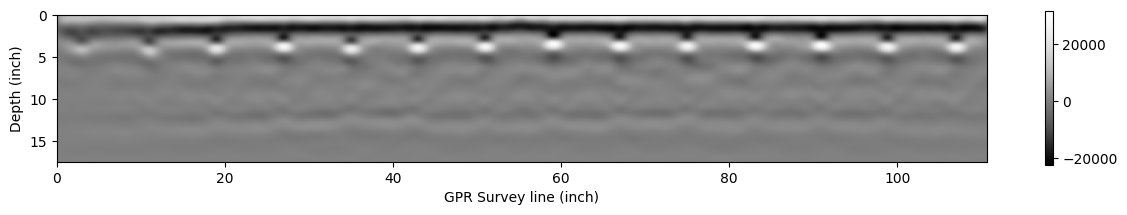

In [29]:
#mean time zero with 1st positive peak cut
fig, ax = plt.subplots(figsize=(15, 2))

depth_per_point = rhf_depth/rh_nsamp
depth_axis = np.linspace(0, depth_per_point * len(adjusted_time0data_t) * 39.37, len(adjusted_time0data_t))
survey_line_axis = profilePos*39.37

heatmap = ax.imshow(migrated_df_m, cmap='Greys_r', extent=[survey_line_axis.min(), survey_line_axis.max(), depth_axis.max(), depth_axis.min()])

# Add colorbar for better interpretation
cbar = plt.colorbar(heatmap, ax=ax)

# Set labels for axes
ax.set_xlabel('GPR Survey line (inch)')
ax.set_ylabel('Depth (inch)')
plt.savefig('H:/GPR_work/mean_time0_migrated.png')

# Show the plot
plt.show()

C:\Users\steve.yang.ctr\Anaconda3\envs\work\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


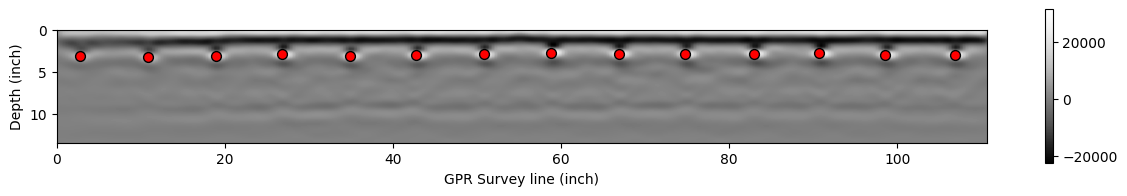

In [30]:
from sklearn.cluster import KMeans
# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 2))

# Calculate depth per point and depth axis in inches
depth_per_point = rhf_depth / rh_nsamp
depth_axis = np.linspace(0, depth_per_point * len(migrated_df_m) * 39.37, len(migrated_df_m))

# Convert survey line axis to inches
survey_line_axis = profilePos * 39.37

# Plot the heatmap
heatmap = ax.imshow(migrated_df_m, cmap='Greys_r', extent=[survey_line_axis.min(), survey_line_axis.max(), depth_axis.max(), depth_axis.min()])

# Add a colorbar
cbar = plt.colorbar(heatmap, ax=ax)

# Normalize the data
normalized_mig_df_m = minmax_scale(migrated_df_m, feature_range=(-1, 1))

# Create meshgrid of indices
x_indices, y_indices = np.meshgrid(np.arange(normalized_mig_df_m.shape[1]), np.arange(normalized_mig_df_m.shape[0]))

# Highlight data points with values higher than a threshold and y-axis index greater than 20
threshold = 0.70  # Adjust this threshold based on your data
threshold_index = int(0.10 * normalized_mig_df_m.shape[0]) #Point out the data if the depth is larger than 10% of your entire depth
highlighted_points = np.column_stack((x_indices[(normalized_mig_df_m > threshold) & (y_indices > threshold_index)],
                                      y_indices[(normalized_mig_df_m > threshold) & (y_indices > threshold_index)]))

# Use KMeans clustering to identify representative points
num_clusters = 14  # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42).fit(highlighted_points)

# Get the cluster centers
cluster_centers_m = kmeans.cluster_centers_

# Convert cluster centers to inches
cluster_centers_inches_m = np.column_stack((cluster_centers_m[:, 0] * survey_line_axis.max() / normalized_mig_df_m.shape[1],
                                          cluster_centers_m[:, 1] * depth_axis.max() / normalized_mig_df_m.shape[0]))

# Overlay scatter points at cluster centers
scatter = ax.scatter(cluster_centers_inches_m[:, 0], cluster_centers_inches_m[:, 1],
                     c='red', marker='o', s=50, edgecolors='black')

# Set labels for axes
ax.set_xlabel('GPR Survey line (inch)')
ax.set_ylabel('Depth (inch)')

plt.savefig('H:/GPR_work/mean_time0_migrated_located.png')
# Show the plot
plt.show()

Migration for scan by scan time zero (Without cutting out)

In [31]:
migrated_df, profilePos, velocity = fkMigration(adjusted_time0data_t, rhf_spm, rhf_sps, rhf_range, rh_nsamp, rhf_espr)

512it [00:00, 22142.20it/s]


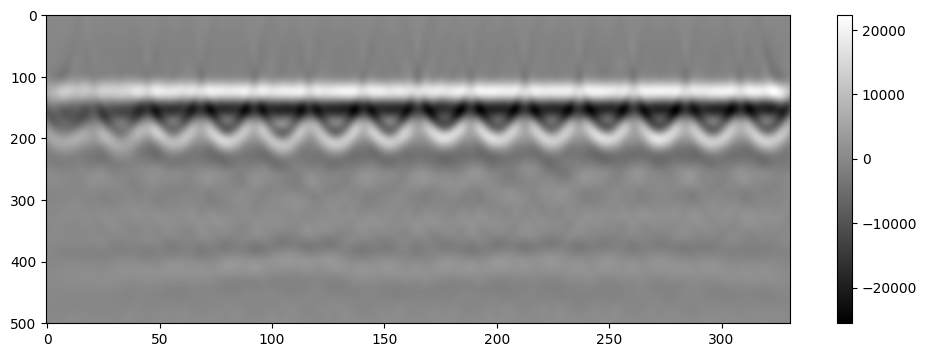

In [32]:
#scan by scan time zero without 1st positive peak cut
fig, ax = plt.subplots(figsize=(12, 4))
heatmap = ax.imshow(migrated_df, cmap='gray', aspect='auto')

ax.set_ylim(migrated_df.shape[0], 0)

cbar = plt.colorbar(heatmap)

plt.show()


In [60]:
time0data_cutout[1]

134    12245.0
135    12229.0
136    12107.0
137    11882.0
138    11539.0
        ...   
506      199.0
507      220.0
508      233.0
509      239.0
510      239.0
Name: 2, Length: 377, dtype: float64

In [70]:
np.arange(0, len(time0data_cutout[1]),1)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

Migration for scan by scan time zero (cut out)

In [21]:
time0data_cutout_adjusted = np.arange(0, len(time0data_cutout[1]),1)

In [22]:
x=[]
y=[]
for i in range (0, df_1.shape[1]-1, 1):
    x.append(np.arange(0, len(time0data_cutout[i]),1))
    y.append(time0data_cutout[i])
common_range = np.arange(max(map(min, x)), min(map(max, x)) + 1)
adjusted_time0data = []
for i in range (0, df_1.shape[1]-1, 1):
    df_temp = pd.DataFrame({'X': x[i], 'Y': y[i]})
    df_temp_common_range = df_temp[df_temp['X'].isin(common_range)]
    adjusted_time0data.append(np.array(df_temp_common_range['Y']))
adjusted_time0data = pd.DataFrame(adjusted_time0data)
adjusted_time0data_t = adjusted_time0data.transpose()

In [23]:
adjusted_time0data_t

0        1        2        3        4        5        6        7    \
0     20.0  12678.0  12245.0  11678.0  11403.0  10888.0  10786.0  11177.0   
1     20.0  12666.0  12229.0  11616.0  11401.0  10886.0  10782.0  11148.0   
2     18.0  12548.0  12107.0  11463.0  11309.0  10804.0  10691.0  11024.0   
3     16.0  12319.0  11882.0  11205.0  11132.0  10635.0  10515.0  10802.0   
4     14.0  11988.0  11539.0  10858.0  10856.0  10377.0  10248.0  10487.0   
..     ...      ...      ...      ...      ...      ...      ...      ...   
371  358.0    310.0    172.0    159.0    455.0    634.0    797.0    828.0   
372  362.0    353.0    199.0    166.0    436.0    598.0    754.0    802.0   
373  363.0    384.0    220.0    170.0    413.0    560.0    704.0    766.0   
374  365.0    403.0    233.0    169.0    387.0    518.0    650.0    722.0   
375  366.0    412.0    239.0    166.0    358.0    474.0    592.0    671.0   

         8        9    ...      321      322      323      324      325  \
0    11561.0  11660.0  ...  19402.0  19053.0  18704.0  18364.0  18791.0   
1    11555.0  11616.0  ...  19206.0  18997.0  18614.0  18344.0  18759.0   
2    11453.0  11473.0  ...  18791.0  18736.0  18320.0  18115.0  18522.0   
3    11255.0  11231.0  ...  18151.0  18265.0  17826.0  17692.0  18077.0   
4    10964.0  10894.0  ...  17291.0  17588.0  17125.0  17067.0  17427.0   
..       ...      ...  ...      ...      ...      ...      ...      ...   
371    687.0    371.0  ...   1267.0    859.0    366.0      5.0    -80.0   
372    679.0    370.0  ...   1178.0    784.0    316.0    -12.0    -71.0   
373    661.0    363.0  ...   1087.0    709.0    270.0    -25.0    -62.0   
374    632.0    349.0  ...    992.0    636.0    230.0    -34.0    -52.0   
375    597.0    329.0  ...    896.0    566.0    192.0    -40.0    -43.0   

         326      327      328      329      330  
0    19093.0  19226.0  19544.0  19208.0  19101.0  
1    19015.0  19159.0  19460.0  19075.0  18933.0  
2    18718.0  18879.0  19164.0  18730.0  18568.0  
3    18213.0  18380.0  18662.0  18187.0  17985.0  
4    17484.0  17666.0  17931.0  17413.0  17203.0  
..       ...      ...      ...      ...      ...  
371     -7.0    167.0    243.0    341.0    419.0  
372     14.0    189.0    248.0    328.0    391.0  
373     32.0    206.0    248.0    313.0    362.0  
374     46.0    216.0    244.0    295.0    333.0  
375     57.0    221.0    236.0    276.0    304.0  

[376 rows x 331 columns]

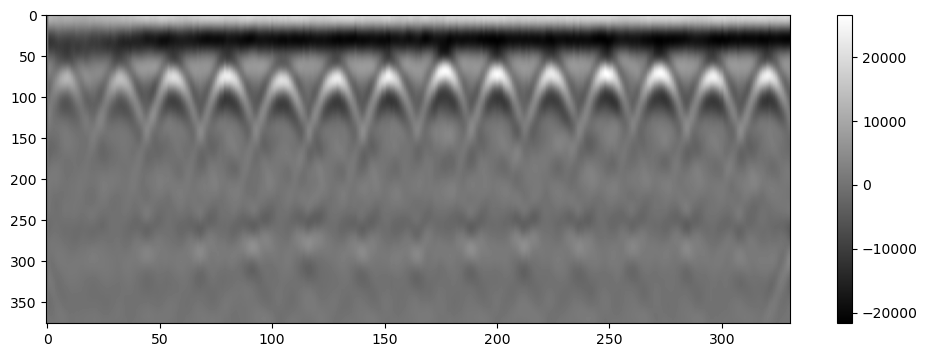

In [24]:
#scan by scan time zero without 1st positive peak cut
fig, ax = plt.subplots(figsize=(12, 4))
heatmap = ax.imshow(adjusted_time0data_t, cmap='gray', aspect='auto')

ax.set_ylim(adjusted_time0data_t.shape[0], 0)

cbar = plt.colorbar(heatmap)

plt.show()


In [25]:
common_range

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [26]:
migrated_df, profilePos, velocity = fkMigration(adjusted_time0data_t, rhf_spm, rhf_sps, rhf_range, rh_nsamp, rhf_espr)

512it [00:00, 20766.69it/s]


In [28]:
profilePos

array([0.        , 0.00849232, 0.01698465, 0.02547697, 0.03396929,
       0.04246162, 0.05095394, 0.05944626, 0.06793859, 0.07643091,
       0.08492323, 0.09341555, 0.10190788, 0.1104002 , 0.11889252,
       0.12738485, 0.13587717, 0.14436949, 0.15286182, 0.16135414,
       0.16984646, 0.17833879, 0.18683111, 0.19532343, 0.20381576,
       0.21230808, 0.2208004 , 0.22929273, 0.23778505, 0.24627737,
       0.2547697 , 0.26326202, 0.27175434, 0.28024666, 0.28873899,
       0.29723131, 0.30572363, 0.31421596, 0.32270828, 0.3312006 ,
       0.33969293, 0.34818525, 0.35667757, 0.3651699 , 0.37366222,
       0.38215454, 0.39064687, 0.39913919, 0.40763151, 0.41612384,
       0.42461616, 0.43310848, 0.4416008 , 0.45009313, 0.45858545,
       0.46707777, 0.4755701 , 0.48406242, 0.49255474, 0.50104707,
       0.50953939, 0.51803171, 0.52652404, 0.53501636, 0.54350868,
       0.55200101, 0.56049333, 0.56898565, 0.57747798, 0.5859703 ,
       0.59446262, 0.60295494, 0.61144727, 0.61993959, 0.62843

In [38]:
adjusted_time0data_t

0        1        2        3        4        5        6        7    \
0     20.0  12678.0  12245.0  11678.0  11403.0  10888.0  10786.0  11177.0   
1     20.0  12666.0  12229.0  11616.0  11401.0  10886.0  10782.0  11148.0   
2     18.0  12548.0  12107.0  11463.0  11309.0  10804.0  10691.0  11024.0   
3     16.0  12319.0  11882.0  11205.0  11132.0  10635.0  10515.0  10802.0   
4     14.0  11988.0  11539.0  10858.0  10856.0  10377.0  10248.0  10487.0   
..     ...      ...      ...      ...      ...      ...      ...      ...   
371  358.0    310.0    172.0    159.0    455.0    634.0    797.0    828.0   
372  362.0    353.0    199.0    166.0    436.0    598.0    754.0    802.0   
373  363.0    384.0    220.0    170.0    413.0    560.0    704.0    766.0   
374  365.0    403.0    233.0    169.0    387.0    518.0    650.0    722.0   
375  366.0    412.0    239.0    166.0    358.0    474.0    592.0    671.0   

         8        9    ...      321      322      323      324      325  \
0    11561.0  11660.0  ...  19402.0  19053.0  18704.0  18364.0  18791.0   
1    11555.0  11616.0  ...  19206.0  18997.0  18614.0  18344.0  18759.0   
2    11453.0  11473.0  ...  18791.0  18736.0  18320.0  18115.0  18522.0   
3    11255.0  11231.0  ...  18151.0  18265.0  17826.0  17692.0  18077.0   
4    10964.0  10894.0  ...  17291.0  17588.0  17125.0  17067.0  17427.0   
..       ...      ...  ...      ...      ...      ...      ...      ...   
371    687.0    371.0  ...   1267.0    859.0    366.0      5.0    -80.0   
372    679.0    370.0  ...   1178.0    784.0    316.0    -12.0    -71.0   
373    661.0    363.0  ...   1087.0    709.0    270.0    -25.0    -62.0   
374    632.0    349.0  ...    992.0    636.0    230.0    -34.0    -52.0   
375    597.0    329.0  ...    896.0    566.0    192.0    -40.0    -43.0   

         326      327      328      329      330  
0    19093.0  19226.0  19544.0  19208.0  19101.0  
1    19015.0  19159.0  19460.0  19075.0  18933.0  
2    18718.0  18879.0  19164.0  18730.0  18568.0  
3    18213.0  18380.0  18662.0  18187.0  17985.0  
4    17484.0  17666.0  17931.0  17413.0  17203.0  
..       ...      ...      ...      ...      ...  
371     -7.0    167.0    243.0    341.0    419.0  
372     14.0    189.0    248.0    328.0    391.0  
373     32.0    206.0    248.0    313.0    362.0  
374     46.0    216.0    244.0    295.0    333.0  
375     57.0    221.0    236.0    276.0    304.0  

[376 rows x 331 columns]

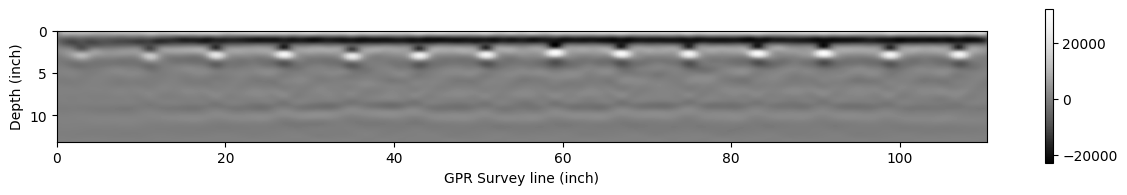

In [39]:
#scan by scan time zero with 1st positive peak cut

fig, ax = plt.subplots(figsize=(15, 2))

depth_per_point = rhf_depth/rh_nsamp
depth_axis = np.linspace(0, depth_per_point * len(adjusted_time0data_t) * 39.37, len(adjusted_time0data_t))
survey_line_axis = profilePos*39.37

heatmap = ax.imshow(migrated_df, cmap='Greys_r', extent=[survey_line_axis.min(), survey_line_axis.max(), depth_axis.max(), depth_axis.min()])

# Add colorbar for better interpretation
cbar = plt.colorbar(heatmap, ax=ax)

# Set labels for axes
ax.set_xlabel('GPR Survey line (inch)')
ax.set_ylabel('Depth (inch)')
plt.savefig('H:/GPR_work/sbs_time0_migrated.png')
# Show the plot
plt.show()

# heatmap = ax.imshow(X =survey_line_axis, Y = depth_axis, cmap='gray', aspect='auto')

# cbar = plt.colorbar(heatmap)
# plt.savefig('H:/GPR_work/sbs_time0_migrated.png')

# plt.show()


C:\Users\steve.yang.ctr\Anaconda3\envs\work\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


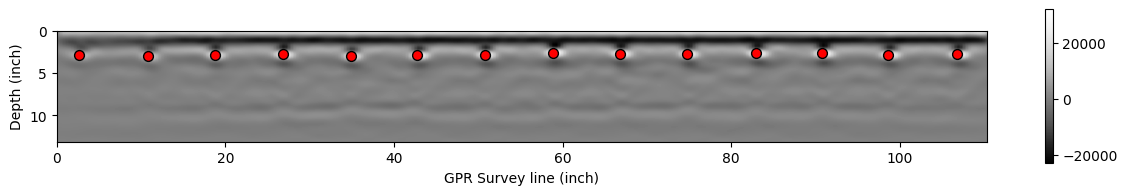

In [44]:
from sklearn.cluster import KMeans
# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 2))

# Calculate depth per point and depth axis in inches
depth_per_point = rhf_depth / rh_nsamp
depth_axis = np.linspace(0, depth_per_point * len(adjusted_time0data_t) * 39.37, len(adjusted_time0data_t))

# Convert survey line axis to inches
survey_line_axis = profilePos * 39.37

# Plot the heatmap
heatmap = ax.imshow(migrated_df, cmap='Greys_r', extent=[survey_line_axis.min(), survey_line_axis.max(), depth_axis.max(), depth_axis.min()])

# Add a colorbar
cbar = plt.colorbar(heatmap, ax=ax)

# Normalize the data
normalized_mig_df = minmax_scale(migrated_df, feature_range=(-1, 1))

# Create meshgrid of indices
x_indices, y_indices = np.meshgrid(np.arange(normalized_mig_df.shape[1]), np.arange(normalized_mig_df.shape[0]))

# Highlight data points with values higher than a threshold and y-axis index greater than 20
threshold = 0.70  # Adjust this threshold based on your data
threshold_index = int(0.10 * normalized_mig_df.shape[0]) #Point out the data if the depth is larger than 10% of your entire depth
highlighted_points = np.column_stack((x_indices[(normalized_mig_df > threshold) & (y_indices > threshold_index)],
                                      y_indices[(normalized_mig_df > threshold) & (y_indices > threshold_index)]))

# Use KMeans clustering to identify representative points
num_clusters = 14  # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42).fit(highlighted_points)

# Get the cluster centers
cluster_centers = kmeans.cluster_centers_

# Convert cluster centers to inches
cluster_centers_inches = np.column_stack((cluster_centers[:, 0] * survey_line_axis.max() / normalized_mig_df.shape[1],
                                          cluster_centers[:, 1] * depth_axis.max() / normalized_mig_df.shape[0]))

# Overlay scatter points at cluster centers
scatter = ax.scatter(cluster_centers_inches[:, 0], cluster_centers_inches[:, 1],
                     c='red', marker='o', s=50, edgecolors='black')

# Set labels for axes
ax.set_xlabel('GPR Survey line (inch)')
ax.set_ylabel('Depth (inch)')

plt.savefig('H:/GPR_work/scan_by_scan_time0_migrated_located.png')
# Show the plot
plt.show()


C:\Users\steve.yang.ctr\Anaconda3\envs\work\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


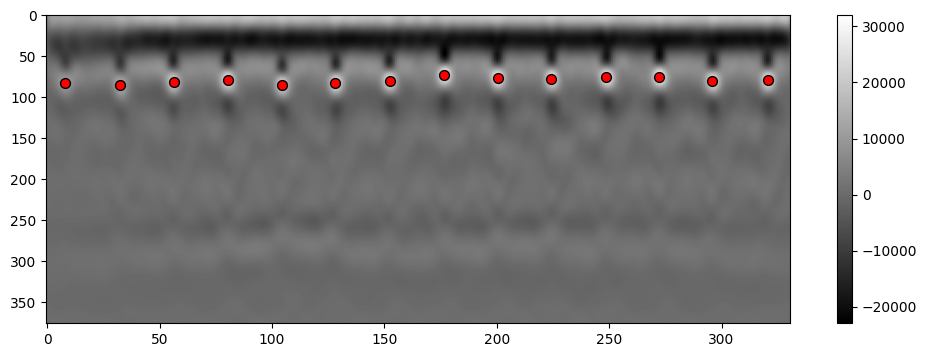

In [42]:
#scan by scan time zero without 1st positive peak cut
from sklearn.cluster import KMeans
fig, ax = plt.subplots(figsize=(12, 4))
heatmap = ax.imshow(migrated_df, cmap='gray', aspect='auto')

ax.set_ylim(migrated_df.shape[0], 0)

cbar = plt.colorbar(heatmap)

normalized_mig_df = minmax_scale(migrated_df, feature_range=(-1, 1))
x_indices, y_indices = np.meshgrid(np.arange(normalized_mig_df.shape[1]), np.arange(normalized_mig_df.shape[0]))
threshold = 0.70 
highlighted_points = np.column_stack((x_indices[(normalized_mig_df > threshold) & (y_indices > 20)],
                                      y_indices[(normalized_mig_df > threshold) & (y_indices > 20)]))
num_clusters = 14
kmeans = KMeans(n_clusters=num_clusters, random_state=42).fit(highlighted_points)

cluster_centers = kmeans.cluster_centers_
scatter = ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='o', s=50, edgecolors='black', label='High Value')
plt.show()

In [45]:
cluster_centers_inches

array([[ 82.91983353,   2.64639707],
       [ 18.80697979,   2.82373888],
       [ 58.84871906,   2.55730895],
       [106.81713715,   2.76237676],
       [ 34.84235429,   2.97778325],
       [ 66.79901119,   2.66936162],
       [  2.65475657,   2.8785223 ],
       [ 42.73428921,   2.87945648],
       [ 90.7990145 ,   2.63545522],
       [ 98.56736968,   2.80139768],
       [ 26.80946999,   2.76336329],
       [ 74.72365951,   2.69791402],
       [ 50.80355097,   2.79677509],
       [ 10.83868792,   2.966717  ]])

In [46]:
cluster_centers_inches_m

array([[ 66.8290325 ,   2.80316505],
       [ 26.82900597,   2.87817098],
       [ 90.73685487,   2.77458604],
       [ 10.81942272,   3.24420217],
       [ 42.72908088,   2.97754546],
       [106.84827034,   2.9114734 ],
       [ 58.82363669,   2.66501368],
       [ 82.96015091,   2.77763078],
       [ 74.76480716,   2.82585686],
       [ 98.54366181,   2.90481047],
       [ 18.90407164,   3.04855173],
       [ 34.84235429,   3.0824115 ],
       [ 50.84224027,   2.87963322],
       [  2.73456241,   3.12980539]])

In [47]:
from sklearn.metrics import mean_squared_error
from scipy.optimize import linear_sum_assignment
cost_matrix = np.linalg.norm(cluster_centers_inches[:, np.newaxis, :] - cluster_centers_inches_m[np.newaxis, :, :], axis=-1)
row_ind, col_ind = linear_sum_assignment(cost_matrix)
aligned_cluster_centers_inches_m = cluster_centers_inches_m[col_ind]
rmse = mean_squared_error(cluster_centers_inches, aligned_cluster_centers_inches_m, squared=False)
print(rmse)

0.10116716994036962


In [83]:
aligned_cluster_centers_inches_m

array([[ 90.73685487,   2.77458604],
       [ 42.72908088,   2.97754546],
       [ 18.90407164,   3.04855173],
       [ 66.8290325 ,   2.80316505],
       [106.84827034,   2.9114734 ],
       [ 58.82363669,   2.66501368],
       [ 10.81942272,   3.24420217],
       [ 82.96015091,   2.77763078],
       [ 34.84235429,   3.0824115 ],
       [ 98.54366181,   2.90481047],
       [ 26.82900597,   2.87817098],
       [ 74.76480716,   2.82585686],
       [ 50.84224027,   2.87963322],
       [  2.73456241,   3.12980539]])

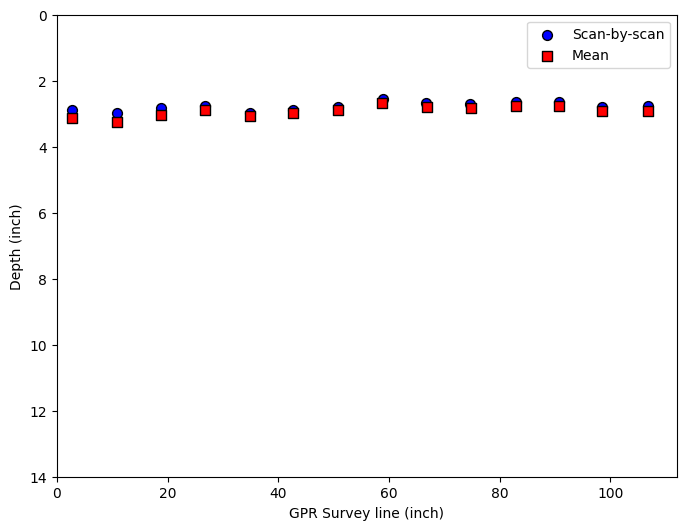

In [48]:
# Assuming cluster_centers_inches and aligned_cluster_centers_inches_m are your arrays
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter plot for cluster_centers_inches
ax.scatter(cluster_centers_inches[:, 0], cluster_centers_inches[:, 1], c='blue', marker='o', s=50, edgecolors='black', label='Scan-by-scan')

# Scatter plot for aligned_cluster_centers_inches_m
ax.scatter(aligned_cluster_centers_inches_m[:, 0], aligned_cluster_centers_inches_m[:, 1], c='red', marker='s', s=50, edgecolors='black', label='Mean')

# Set labels for axes
ax.set_xlabel('GPR Survey line (inch)')
ax.set_ylabel('Depth (inch)')
ax.set_ylim(depth_axis.min(), 14)
ax.invert_yaxis()
ax.set_xlim(survey_line_axis.min())
# Add legend
ax.legend()

plt.savefig('H:/GPR_work/migrated_located_difference.png')
# Show the plot
plt.show()